# Dataset - Linkedin Job Postings (2023-2024)

# Ask 1 : Identifying the data

## Identify and briefly describe your dataset 

The LinkedIn Job Postings (2023-2024) dataset is a comprehensive overview of the present job market. The dataset captures more than 124,000 job listings/postings within the time frame of 2023-2024. For this dataset the existing entities fall under these titles: companies, jobs, mappings and postings which present valuable attributes to understand the existing market dynamics. This dataset is available in csv format here Link to Access LinkedIn Job Postings (2023-2024). This dataset’s size is 556.5 MB and was last updated 4 months ago. The main data set has 123,850 records at the transactional level and around 31 variables. Each record represents a job posting. There is also 10 complementary files, which contain additional data regarding each job posting. In total, this complementary files add up to 741,793 additional records, for a total of 865,643.

The link to the data is https://www.kaggle.com/datasets/arshkon/linkedin-job-postings/data

## Identify the owner of the dataset source

The owner of this dataset source is Arsh Koneru-Ansari who also developed a linkedin job scraper with the purpose of being able to collect and store job postings and their associated attributes. 

##  Brief description of why the dataset is important and what appeals to you about it

This dataset is relevant and provides added value on both an individual level and on a company based level. 

The dataset provides company relevance in terms of talent acquisition strategies. In making more informed decisions, companies can use this data analysis to get a better picture of how the salaries, benefits and compensation packages are structured. Additionally, companies can achieve a competitive advantage by understanding how compensation works, how to tailor their recruitment strategies to attract top talents and offer more competitive salaries/benefits compared to others. With insights from industry benchmarking, companies can develop proper retention strategies to reduce their turnover and keep valuable employees. It also provides a way for them to forecast job demand by looking at the most demanded jobs and gives them the ability to anticipate future changes in the market on different levels. It also allows HR and hiring managers with a solid background when it comes to salaries and as such better negotiation power. 

    
On the individual level this dataset provides all members of the group with information with regards to salaries and their associated job postings which would essentially enable each person to determine their own professional goals for prospective jobs and perhaps also determine what skill are most in demand and which industries are thriving the most in addition to the job type preferences


# Data Preparation

Based on ask 1, the data will then be wrangled into a format suitable for dimensional modeling analysis. Through cleaning, filtering, merging , modeling diagram

Download the data from Kaggle to PC and then upload the ZIP file to the server.

*The !unzip command*  is used to extract the contents of a ZIP file into the current working directory 

In [1]:
!unzip archive.zip

Archive:  archive.zip
  inflating: companies/companies.csv  
  inflating: companies/company_industries.csv  
  inflating: companies/company_specialities.csv  
  inflating: companies/employee_counts.csv  
  inflating: jobs/benefits.csv       
  inflating: jobs/job_industries.csv  
  inflating: jobs/job_skills.csv     
  inflating: jobs/salaries.csv       
  inflating: mappings/industries.csv  
  inflating: mappings/skills.csv     
  inflating: postings.csv            


**Commands used**
1. *!mv /home/ubuntu/jobs/* /home/ubuntu/:*
Moves all files (*) from the jobs subdirectory into the parent directory /home/ubuntu/.
2. *!mv /home/ubuntu/companies/* /home/ubuntu/:*
Moves all files from the companies subdirectory into /home/ubuntu/.
3. *!mv /home/ubuntu/mappings/* /home/ubuntu/:*
Moves all files from the mappings subdirectory into /home/ubuntu/.

**To summarize the commands are moving files from subdirectories (jobs, companies, mappings) into the /home/ubuntu/ directory**

In [2]:
!mv /home/ubuntu/jobs/* /home/ubuntu
!mv /home/ubuntu/companies/* /home/ubuntu
!mv /home/ubuntu/mappings/* /home/ubuntu

*The !rmdir commands are used to remove directories, but only if they are empty.*

In [3]:
!rmdir /home/ubuntu/jobs
!rmdir /home/ubuntu/companies
!rmdir /home/ubuntu/mappings

Salaries is not needed because the info is already in the postings file therefore the !rm command is used to delete it from the working directory 

In [4]:
!rm salaries.csv

**The csvclean command** is part of the csvkit suite of tools and is used to clean and validate CSV files. Adding the -n flag does a dry run to check the file without modifying it

*For each file, csvclean will report:* 
1) If the file is valid: no errors found.
2) If the file has issues: details about malformed rows (e.g., mismatched columns, empty rows).

In [5]:
!csvclean -n postings.csv
!csvclean -n benefits.csv
!csvclean -n job_industries.csv
!csvclean -n job_skills.csv
!csvclean -n companies.csv
!csvclean -n employee_counts.csv
!csvclean -n company_industries.csv
!csvclean -n company_specialities.csv
!csvclean -n industries.csv 
!csvclean -n skills.csv 

No errors.
No errors.
No errors.
No errors.
No errors.
No errors.
No errors.
No errors.
No errors.
No errors.


## Initial Exploration and dimensional modeling

In [6]:
!csvstat postings.csv

/usr/lib/python3/dist-packages/agate/table/from_csv.py:67: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  kwargs['dialect'] = csv.Sniffer().sniff(contents.getvalue()[:sniff_limit])
  1. "job_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       123849
	Unique values:         123849
	Smallest value:        921716
	Largest value:         3906267224
	Sum:                   482565508398403
	Mean:                  3896402138.075
	Median:                3901998406
	StDev:                 84043545.162
	Most decimal places:   0
	Most common values:    921716 (1x)
	                       1829192 (1x)
	                       10998357 (1x)
	                       23221523 (1x)
	                       35982263 (1x)

  2. "company_name"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Non-null values:       122130
	Unique values:         24429
	Longest value:         100 characters
	Most common 

We used the information from the csvstat command that csvkit provides to gather iniital information regarding the main file. We also used the detailed information from each file that can be found in the Kaggle link.

This dataset is suitable for dimensional modeling. When we take a look at our initial table structure, there was a clear mix between numerical and categorical data, but it was not optimized for thorough analysis. The transformed model utilizes a star schema design with a central table containing keys relating to companies, jobs, industries, salaries, etc. This new structure of a central table offers advantages relating to improved query performance for complex analytical questions, enhanced data organization with related attributes grouped logically, increased flexibility for various types of analysis, and better scalability for future additions. This transformed model is now better suited to answer questions relating to salary across IT industries and position types, compensation depending on state, and industries with the greatest number of applicants. In all, this dimensional model transformation has improved the overall utility of the dataset for in-depth analysis and reporting in regards to LinkedIn job postings.

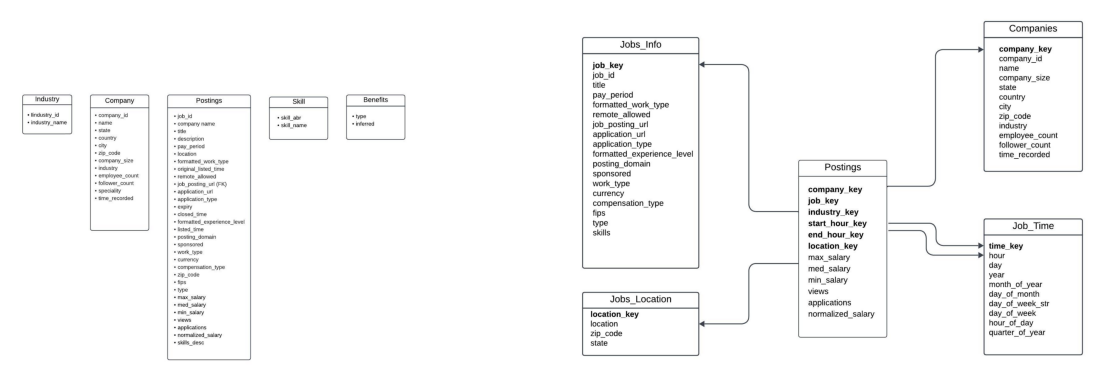

In [151]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

image_path = "/home/ubuntu/Star_schema.jpeg"
img = mpimg.imread(image_path)
plt.figure(figsize=(14, 10))
plt.imshow(img)
plt.axis('off') 
plt.show()


##  Describe the analytical questions you want to answer with the data. Three (3) major questions are required 

### 1. How do average salaries vary across different IT industries and position types?

#### Explanation
This question investigates the disparities in compensation across various IT sectors (e.g., software development, cybersecurity, cloud computing) and job roles (e.g., entry-level, senior, managerial positions). Understanding these variations provides insight into:

- *Demand Trends*: Identifying which industries and positions are valued higher in the market.
- *Talent Allocation*: Helping job seekers and professionals align their skills and career paths with high-paying opportunities.
- *Budgeting for Employers*: Assisting companies in setting competitive salary benchmarks to attract and retain top talent.

####  Analytical Value
- Enables *market segmentation* based on salary data.
- Highlights which industries and roles contribute most to wage inequality.
- Informs *policy decisions* or strategies for educational institutions in curriculum design to prepare students for lucrative roles.



### 2. What states offer the lowest and highest compensation?

####  Explanation
Analyzing geographic salary trends identifies regions with the highest and lowest pay scales in the IT industry. This can depend on factors such as cost of living, demand for IT skills, and regional economic conditions.
                                                                                                                                                
####  Analytical Value
- *Job Seekers*: Provides actionable data for relocation decisions based on salary potential and cost of living.
- *Employers*: Guides businesses in setting localized salary structures to remain competitive.
- *Policymakers*: Highlights disparities that could inform workforce development programs or regional economic strategies.



### 3. What are the industries with the highest amount of applicants?

####  Explanation
This question focuses on understanding the competition for jobs in various IT industries by evaluating the number of applicants per sector. It helps identify where the supply of labor is concentrated.

####  Analytical Value
- *Job Market Trends*: Helps job seekers understand the competitive landscape in specific industries.
- *Talent Management*: Aids companies in identifying industries where they might face a surplus or shortage of applicants.
- *Educational Institutions*: Guides curriculum development to align with industries attracting the most talent.
- *Economic Indicators*: Reflects broader economic trends such as automation, digitization, or growth in specific sectors.

#### Conclusion
Addressing these questions provides a comprehensive view of the IT job market, enabling stakeholders—including job seekers, employers, educators, and policymakers—to make informed decisions based on salary and applicant trends.

## Briefly describe any concerns with the data and changes you expect to overcome

* It is expected that the data would require a lot of cleaning. Due to reasons such as missing or duplicate values. Perhaps also inconsistent formatting for the measures such as salaries which we assume will require alterations. 
* We expect that the tables would also need to be joined together in a way that would make querying easier and would also go along with our conceptual dimensional model
* Postings with minimal data entries may need filtering. The data may need to be filtered to provide meaningful results - especially when it comes to the measures.
* Given that it is only 1 year - data may be overrepresenting what is actually going on. 

**Expected Changes to Overcome Issues**
* Data Cleaning: Imputing or dropping missing values as necessary. Remove duplicates based on unique identifiers (e.g., job ID). Standardize text fields (e.g., lowercase, remove special characters).
* Data Transformation: Normalize salary data.
* Validation: Manually verify a subset of data for accuracy and consistency.

# Data Wrangling

## Postings file (main-file)

*The command !xsv headers filename.csv is used to display the column headers of a CSV file when using the xsv tool.* 

In [7]:
!xsv headers postings.csv

1   job_id
2   company_name
3   title
4   description
5   max_salary
6   pay_period
7   location
8   company_id
9   views
10  med_salary
11  min_salary
12  formatted_work_type
13  applies
14  original_listed_time
15  remote_allowed
16  job_posting_url
17  application_url
18  application_type
19  expiry
20  closed_time
21  formatted_experience_level
22  skills_desc
23  listed_time
24  posting_domain
25  sponsored
26  work_type
27  currency
28  compensation_type
29  normalized_salary
30  zip_code
31  fips


*Explanation of the Command*
1) xsv select: This subcommand extracts specific columns from the CSV file.
2) postings.csv: The input CSV file.
3) (>): Redirects the output to a new file.
4) postings_nodesc.csv:The new file containing only the selected columns.

**Output is A CSV file postings_nodesc.csv will be created, excluding company name (column 2), description (column 4), and skills_desc (column 22) as they are not needed.** 

Both company name and skills_desc are in other files. 
    
Description is the whole text from the Linkedin posting and it sometimes can damage the csv structure.


In [8]:
!xsv select 1,3,4,5-21,23-31 postings.csv > postings_db.csv

*This command provides a concise summary of the column names in postings_db.csv*

In [9]:
!xsv headers postings_db.csv

1   job_id
2   title
3   description
4   max_salary
5   pay_period
6   location
7   company_id
8   views
9   med_salary
10  min_salary
11  formatted_work_type
12  applies
13  original_listed_time
14  remote_allowed
15  job_posting_url
16  application_url
17  application_type
18  expiry
19  closed_time
20  formatted_experience_level
21  listed_time
22  posting_domain
23  sponsored
24  work_type
25  currency
26  compensation_type
27  normalized_salary
28  zip_code
29  fips


*Running a csvstat on job_id to see if there are mainly unique values*

In [12]:
!csvstat -c job_id postings_db.csv

/usr/lib/python3/dist-packages/agate/table/from_csv.py:67: RuntimeWarning: Error sniffing CSV dialect: Could not determine delimiter
  kwargs['dialect'] = csv.Sniffer().sniff(contents.getvalue()[:sniff_limit])
  1. "job_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       123849
	Unique values:         123849
	Smallest value:        921716
	Largest value:         3906267224
	Sum:                   482565508398403
	Mean:                  3896402138.075
	Median:                3901998406
	StDev:                 84043545.162
	Most decimal places:   0
	Most common values:    921716 (1x)
	                       1829192 (1x)
	                       10998357 (1x)
	                       23221523 (1x)
	                       35982263 (1x)

Row count: 123849


## Company-related Files

**Main file**

**Running a csvstat to take a look at the structure of the data** 

Columns like state, city, and country are expected to have non-unique values due to their categorical nature.

Columns such as name, description, address, and zip_code require investigation to understand the cause of duplicates and how to handle them.


In [13]:
!csvstat companies.csv

  1. "company_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       24473
	Unique values:         24473
	Smallest value:        1009
	Largest value:         103472979
	Sum:                   502244490163
	Mean:                  20522391.622
	Median:                2738154
	StDev:                 31659289.155
	Most decimal places:   0
	Most common values:    1009 (1x)
	                       1016 (1x)
	                       1025 (1x)
	                       1028 (1x)
	                       1033 (1x)

  2. "name"

	Type of data:          Text
	Contains null values:  True (excluded from calculations)
	Non-null values:       24472
	Unique values:         24429
	Longest value:         100 characters
	Most common values:    Confidential (5x)
	                       The North Face (2x)
	                       Gallagher (2x)
	                       JSI (2x)
	                       Baptist Health (2x)

  3. "description"

	Type of data:          Text
	Conta

### Analysis of Columns for Data Quality

#### **Columns with Potential Issues**
These columns have missing values, duplicates, or require additional cleaning.

1. **`name`**
   - **Issue**: Contains 1 null value and 44 non-unique entries (e.g., "Confidential" appears 5 times).
   - **Impact**: May affect company-level analysis or joins with other datasets.
   - **Suggestion**: Impute missing values if necessary and consider deduplication.

2. **`description`**
   - **Issue**: 300 null values and repeated entries like "None" or placeholders.
   - **Impact**: Repeated or missing descriptions may skew text analysis or provide little value.
   - **Suggestion**: Exclude null or placeholder entries if the description is critical.

3. **`company_size`**
   - **Issue**: 2,774 null values; categorized into only 8 unique values.
   - **Impact**: Missing values could affect size-based segmentation or aggregation.
   - **Suggestion**: Use imputation or treat nulls as a separate category.

4. **`state`**
   - **Issue**: 24 null values and inconsistency between full names (e.g., "California") and abbreviations (e.g., "CA").
   - **Impact**: May complicate location-based analysis.
   - **Suggestion**: Standardize state names and impute nulls if possible.

5. **`city`**
   - **Issue**: 1 null value and duplicates due to generic entries like "0" (1,004 occurrences).
   - **Impact**: Generic or missing cities reduce location analysis granularity.
   - **Suggestion**: Exclude or correct invalid city names like "0."

6. **`zip_code`**
   - **Issue**: 30 null values and 3,060 occurrences of the generic value "0."
   - **Impact**: Affects regional aggregation or geocoding.
   - **Suggestion**: Impute nulls and exclude generic values for accurate analysis.

7. **`address`**
   - **Issue**: 28 null values and duplicates (e.g., "New York" appears multiple times as an address).
   - **Impact**: Duplicate or missing addresses may limit their utility.
   - **Suggestion**: Deduplicate and validate addresses for accuracy.

---

#### **Columns Ideal for Analysis**
These columns are clean and require minimal or no preprocessing.

1. **`company_id`**
   - **Strength**: Unique, no null values, perfect for primary key usage.
   - **Use**: Can serve as a reliable identifier for joins and company-level analysis.

2. **`country`**
   - **Strength**: Fully populated, only 81 unique values.
   - **Use**: Ideal for country-level grouping or segmentation.

3. **`url`**
   - **Strength**: Unique, no null values, each company has a corresponding URL.
   - **Use**: Useful for linking external resources or web-based validation.

---

### Recommendations
1. **Address Missing and Placeholder Data**:
   - For critical columns like `name`, `description`, `state`, and `city`, impute missing values or remove placeholders (e.g., "None" or "0").

2. **Standardize Categorical Data**:
   - Ensure consistency in columns like `state` and `zip_code` to avoid mismatches during analysis.

3. **Leverage Clean Columns**:
   - Columns like `company_id`, `country`, and `url` are ready for use in grouping, linking, or validation tasks.

4. **Deduplicate Entries**:
   - Resolve duplicates in columns like `address` and `name` to maintain data quality.

By addressing these issues, the dataset will become more reliable and insightful for analysis.


*The command !wc -l companies.csv is used to count the number of lines in the jobs.csv file.*

In [14]:
!wc -l companies.csv

141027 companies.csv


In this case there are a total of 141,027 rows in companies.csv. However when comparing with csvstat, there should be only 24,473 on the basis of unique IDs. A column is causing an error in the reading, so we are going to remove the column description which can contain commas that damage the structure and provide no needed information towards our analysis. 

*Taking a look at the headers from companies*

In [15]:
!xsv headers companies.csv

1   company_id
2   name
3   description
4   company_size
5   state
6   country
7   city
8   zip_code
9   address
10  url


*The xsv has been run to remove the columns description, address and url as they will not be part of the analysis done further.*

In [16]:
!xsv select 1,2,4-8 companies.csv > nodesc_companies.csv

**Taking a look at the number of rows after removing the duplicates and unuseful columns in our analysis**

In [17]:
!wc -l nodesc_companies.csv

24474 nodesc_companies.csv


We are now going to analyze the other files containing additional information for each company to find the appropiate way to consolidate the data.

**Company industries**

There seems to be 10 companies that have listed more than one industry. As the number is small, we are going to delete the duplicate row and only account for one of the industries.

In [18]:
!csvstat -c company_id company_industries.csv

  1. "company_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       24375
	Unique values:         24365
	Smallest value:        1009
	Largest value:         103472979
	Sum:                   496900475060
	Mean:                  20385660.515
	Median:                2708302
	StDev:                 31580834.317
	Most decimal places:   0
	Most common values:    87089640 (2x)
	                       2831596 (2x)
	                       1687254 (2x)
	                       13637042 (2x)
	                       27292 (2x)

Row count: 24375


The xsv sort command is used to sort the CSV file by the column company_id and the awk command is used to remove duplicate rows from the CSV file based on the first column (in this case, likely company_id) and save the result to a new csv.

As we can see in the next csvstat, the unique values now match the total non-null values.

In [19]:
!xsv sort -s company_id company_industries.csv | awk -F, '!seen[$1]++' > company_industries_final.csv

*This csvstat showcases that there are now unique values so it confirms that the duplicates have been removed*

In [20]:
!csvstat -c company_id company_industries_final.csv

  1. "company_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       24365
	Unique values:         24365
	Smallest value:        1009
	Largest value:         103472979
	Sum:                   496687928056
	Mean:                  20385303.84
	Median:                2708302
	StDev:                 31581251.67
	Most decimal places:   0
	Most common values:    10000 (1x)
	                       10001 (1x)
	                       10001423 (1x)
	                       10001514 (1x)
	                       100027 (1x)

Row count: 24365


**Employee counts**

Employee counts can have multiple rows for each company because if the company has posted jobs thourgh time, the employee count may have varied. For the purpose of our analysis we are going to merge the data and take just the first encountered value into account because looking at the data the varations are not significative.

In [21]:
!csvstat -c company_id employee_counts.csv

  1. "company_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       35787
	Unique values:         24473
	Smallest value:        1009
	Largest value:         103472979
	Sum:                   597018083660
	Mean:                  16682540.69
	Median:                1339209
	StDev:                 29247215.543
	Most decimal places:   0
	Most common values:    5235 (13x)
	                       33242739 (13x)
	                       1681 (12x)
	                       79383535 (12x)
	                       11056 (11x)

Row count: 35787


**Removing all duplicate values because there were only 24,473 unique values out of 35,787 values** using the xsvsort and awk command to create a new file called employee_counts_final.csv without the duplicates

In [22]:
!xsv sort -s company_id employee_counts.csv | awk -F, '!seen[$1]++' > employee_counts_final.csv

*This csvstat further confirms that there are no unique values**

In [23]:
!csvstat -c company_id employee_counts_final.csv

  1. "company_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       24473
	Unique values:         24473
	Smallest value:        1009
	Largest value:         103472979
	Sum:                   502244490163
	Mean:                  20522391.622
	Median:                2738154
	StDev:                 31659289.155
	Most decimal places:   0
	Most common values:    10000 (1x)
	                       10001 (1x)
	                       10001423 (1x)
	                       10001514 (1x)
	                       100027 (1x)

Row count: 24473


**Merging the company data**

With no duplicates in the files, we can now merge the files into a single file containing all the information. We use a join left. Making use of the company_id in all our joins creating temporal files which are to be connected with other files to create our ending file companies_v2.csv and removing all useless temporal files temp_companies_1.csv nodesc_companies.csv company_industries_final.csv employee_counts_final.csv


In [24]:
# Merge companies.csv and company_industries_final.csv without duplicate headers
!xsv join --left company_id nodesc_companies.csv company_id company_industries_final.csv > temp_companies_1.csv

# Merge the result with employee_counts.csv without duplicate headers
!xsv join --left company_id temp_companies_1.csv company_id employee_counts_final.csv > companies_v2.csv

# Clean up intermediate files
!rm temp_companies_1.csv nodesc_companies.csv company_industries_final.csv employee_counts_final.csv


**Using the xsv headers to take a quick look onto companies_v2.csv**

In [25]:
!xsv headers companies_v2.csv

1   company_id
2   name
3   company_size
4   state
5   country
6   city
7   zip_code
8   company_id
9   industry
10  company_id
11  employee_count
12  follower_count
13  time_recorded


When we left joined the files, the header of each file was also merged. We remove this duplicate by not selecting this columns

In [26]:
!xsv select 1-7,9,11-13 companies_v2.csv > companies_db.csv

**Confirming that duplicate company_ids have been removed**

In [27]:
!xsv headers companies_db.csv

1   company_id
2   name
3   company_size
4   state
5   country
6   city
7   zip_code
8   industry
9   employee_count
10  follower_count
11  time_recorded


*Running a csvclean and csvstat on the company id only to make sure that we had retained only unique values and that there are no duplicates or errors*

In [28]:
!csvclean -n companies_db.csv

No errors.


*Running a csvstat on the company id only to make sure that we had retained only unique values and that there are no duplicates*

In [29]:
!csvstat -c company_id companies_db.csv

  1. "company_id"

	Type of data:          Number
	Contains null values:  False
	Non-null values:       24473
	Unique values:         24473
	Smallest value:        1009
	Largest value:         103472979
	Sum:                   502244490163
	Mean:                  20522391.622
	Median:                2738154
	StDev:                 31659289.155
	Most decimal places:   0
	Most common values:    1009 (1x)
	                       1016 (1x)
	                       1025 (1x)
	                       1028 (1x)
	                       1033 (1x)

Row count: 24473


## Benefits-related files

In [30]:
!xsv headers benefits.csv

1   job_id
2   inferred
3   type


Dropping inferred because mostly null

In [31]:
!xsv select 1,3 benefits.csv > benefits_db.csv

## Skills-related files

In [32]:
!xsv headers skills.csv

1   skill_abr
2   skill_name


In [33]:
!xsv headers job_skills.csv

1   job_id
2   skill_abr


In [34]:
!xsv join --left skill_abr job_skills.csv skill_abr skills.csv | xsv select 1,2,4 > skills_db.csv

In [35]:
!xsv headers skills_db.csv

1   job_id
2   skill_abr
3   skill_name


# Setup - SQL tables

## Initializing SQL

*First, use PostgreSQL's dropdb command to drop the database named Linkedin, if it exists. It is necessary so that we can run this notebook repeatedly.* 
1) dropdb: error: database removal failed: ERROR:  database "finalp" does not exist if this error is encountered that is okay
2) however if there is an existing database the kernel might need to be restarted

In [36]:
!dropdb -U student finalp

dropdb: error: database removal failed: ERROR:  database "finalp" is being accessed by other users
DETAIL:  There is 1 other session using the database.


*!createdb -U postgres is used to create a new PostgreSQL database named finalp under the user postgres.*

In [37]:
!createdb -U student finalp

createdb: error: database creation failed: ERROR:  database "finalp" already exists


%load_ext sql is used to load the SQL extension in a Jupyter Notebook, enabling the use of SQL queries directly within notebook cells. 

In [38]:
%load_ext sql

/home/ubuntu/.python3-venv/lib/python3.12/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


%sql postgresql://postgres@/finalp is used to connect to a PostgreSQL database named Linkedin using the ipython-sql extension

In [39]:
%sql postgresql://student@/finalp

Connecting to 'postgresql://student@/finalp'

## Job Postings Table

DROP TABLE IF EXISTS job_data; Ensures any existing job_data table is dropped before creating the new one. Prevents errors if the table already exists.

CREATE TABLE job_data (...) Creates a new table named job_data with the specified columns and data types

In [40]:
%%sql
DROP TABLE IF EXISTS postings CASCADE;

CREATE TABLE postings (
    job_id BIGINT NOT NULL,
    title TEXT NOT NULL,
    description TEXT,
    max_salary NUMERIC(12, 2),
    pay_period TEXT,
    location TEXT NOT NULL,
    company_id FLOAT,
    views FLOAT,
    med_salary NUMERIC(12, 2),
    min_salary NUMERIC(12, 2),
    formatted_work_type TEXT NOT NULL,
    applies FLOAT,
    original_listed_time FLOAT NOT NULL,
    remote_allowed TEXT,
    job_posting_url TEXT NOT NULL,
    application_url TEXT,
    application_type TEXT NOT NULL,
    expiry FLOAT NOT NULL,
    closed_time FLOAT,
    formatted_experience_level TEXT,
    listed_time FLOAT NOT NULL,
    posting_domain TEXT,
    sponsored BOOLEAN NOT NULL DEFAULT FALSE,
    work_type TEXT NOT NULL,
    currency TEXT,
    compensation_type TEXT,
    normalized_salary NUMERIC(12, 2),
    zip_code INTEGER,
    fips INTEGER
);

Running query in 'postgresql://student@/finalp'

++
||
++
++

### Adding comments

Running the corrected SQL statements to apply comments to the jobs table, ensuring the documentation accurately describes the schema.

In [41]:
%%sql
COMMENT ON COLUMN postings.job_id IS 'job_id: Unique identifier for each job, must not be null.';
COMMENT ON COLUMN postings.title IS 'title: Title of the job position, must not be null.';
COMMENT ON COLUMN postings.max_salary IS 'max_salary: Maximum salary offered for the position, up to 12 digits with 2 decimal places.';
COMMENT ON COLUMN postings.pay_period IS 'pay_period: Payment period for the job (e.g., hourly, monthly, yearly).';
COMMENT ON COLUMN postings.location IS 'location: Location where the job is based, must not be null.';
COMMENT ON COLUMN postings.company_id IS 'company_id: Identifier for the company offering the job.';
COMMENT ON COLUMN postings.views IS 'views: Number of times the job posting has been viewed.';
COMMENT ON COLUMN postings.med_salary IS 'med_salary: Median salary for the position, up to 12 digits with 2 decimal places.';
COMMENT ON COLUMN postings.min_salary IS 'min_salary: Minimum salary offered for the position, up to 12 digits with 2 decimal places.';
COMMENT ON COLUMN postings.formatted_work_type IS 'formatted_work_type: Description of the work type (e.g., full-time, part-time), must not be null.';
COMMENT ON COLUMN postings.applies IS 'applies: Number of applications submitted for the job.';
COMMENT ON COLUMN postings.original_listed_time IS 'original_listed_time: Timestamp indicating when the job was originally listed, must not be null.';
COMMENT ON COLUMN postings.remote_allowed IS 'remote_allowed: Indicates if remote work is allowed (e.g., Yes, No).';
COMMENT ON COLUMN postings.job_posting_url IS 'job_posting_url: URL to the job posting, must not be null.';
COMMENT ON COLUMN postings.application_url IS 'application_url: URL for submitting applications for the job.';
COMMENT ON COLUMN postings.application_type IS 'application_type: Type of application process (e.g., direct, referral), must not be null.';
COMMENT ON COLUMN postings.expiry IS 'expiry: Timestamp indicating when the job posting will expire, must not be null.';
COMMENT ON COLUMN postings.closed_time IS 'closed_time: Timestamp indicating when the job posting was closed, if applicable.';
COMMENT ON COLUMN postings.formatted_experience_level IS 'formatted_experience_level: Description of the required experience level (e.g., entry-level, senior).';
COMMENT ON COLUMN postings.listed_time IS 'listed_time: Timestamp indicating when the job was listed, must not be null.';
COMMENT ON COLUMN postings.posting_domain IS 'posting_domain: Domain or platform where the job is posted.';
COMMENT ON COLUMN postings.sponsored IS 'sponsored: Indicates if the job posting is sponsored, defaults to FALSE.';
COMMENT ON COLUMN postings.work_type IS 'work_type: Type of work arrangement (e.g., contract, part-time), must not be null.';
COMMENT ON COLUMN postings.currency IS 'currency: Currency used for salary or compensation (e.g., USD, EUR).';
COMMENT ON COLUMN postings.compensation_type IS 'compensation_type: Type of compensation offered (e.g., salary, commission).';
COMMENT ON COLUMN postings.normalized_salary IS 'normalized_salary: Adjusted or annualized salary for comparison purposes.';
COMMENT ON COLUMN postings.zip_code IS 'zip_code: ZIP code for the job location.';
COMMENT ON COLUMN postings.fips IS 'fips: FIPS code used for geographic identification of the job location.';

Running query in 'postgresql://student@/finalp'

++
||
++
++

This SQL query retrieves and showcases the descriptions (comments) of columns in the postings table in the public schema.

In [42]:
%%sql
SELECT cols.column_name,
       pg_catalog.col_description(c.oid, cols.ordinal_position::int) AS column_description
FROM pg_catalog.pg_class c
JOIN information_schema.columns cols
  ON cols.table_name = c.relname
WHERE upper(c.relname) = 'POSTINGS' 
  AND cols.table_schema = 'public'; 

Running query in 'postgresql://student@/finalp'

29 rows affected.

column_name,column_description
job_id,"job_id: Unique identifier for each job, must not be null."
title,"title: Title of the job position, must not be null."
description,None
max_salary,"max_salary: Maximum salary offered for the position, up to 12 digits with 2 decimal places."
pay_period,"pay_period: Payment period for the job (e.g., hourly, monthly, yearly)."
location,"location: Location where the job is based, must not be null."
company_id,company_id: Identifier for the company offering the job.
views,views: Number of times the job posting has been viewed.
med_salary,"med_salary: Median salary for the position, up to 12 digits with 2 decimal places."
min_salary,"min_salary: Minimum salary offered for the position, up to 12 digits with 2 decimal places."


#### Command Explanation: `COMMENT ON TABLE jobs`

This command adds a **description** (comment) to the `postings` table in a PostgreSQL database. The purpose of the comment is to document the table's contents and its intended use.


In [43]:
%%sql
COMMENT ON TABLE postings IS
'postings table: Contains information about job postings, including details about the job title, salary, company, location, and other related metadata.';

Running query in 'postgresql://student@/finalp'

++
||
++
++

This SQL query retrieves the **comment (description)** associated with the `jobs` table in a PostgreSQL database.

In [44]:
%%sql
SELECT obj_description(oid, 'pg_class') AS table_description
FROM pg_class
WHERE upper(relname) = 'POSTINGS'; 

Running query in 'postgresql://student@/finalp'

1 rows affected.

table_description
"postings table: Contains information about job postings, including details about the job title, salary, company, location, and other related metadata."


### Adding data

*This command COPY is used to load data from the final_jobs.csv file into the job_data table in a PostgreSQL database.*

In [46]:
%%sql
COPY postings FROM  '/home/ubuntu/postings_db.csv'
CSV
HEADER;

Running query in 'postgresql://student@/finalp'

123849 rows affected.

++
||
++
++

123850 postings_db.csv are the current number of rows hence why the wc -l was run is to confirm against the copying command that all rows have been properly loaded into the database which is the case since 123849 rows affected that is excluding the header row 

### Data cleaning

**The column called "normalized_salary" has some unusual values (from the csvstat) so we must clean it because we need that column for our calculations.**

The problem comes for some miscalculations by doing the operation of max_value * pay_period. We analyzed the data and realized we need to clean it. We are going to use SQL to update the column based on the conditions we found

In [47]:
%%sql
UPDATE postings
SET max_salary = CASE
    WHEN pay_period = 'HOURLY' AND max_salary <= 1000 THEN max_salary * 40 * 52
    WHEN pay_period = 'BIWEEKLY' AND max_salary <= 10000 THEN max_salary * 2 * 12
    WHEN pay_period = 'MONTHLY' AND max_salary >= 1000 THEN max_salary * 12
    WHEN pay_period = 'WEEKLY' THEN max_salary * 52
    ELSE max_salary
END
WHERE max_salary IS NOT NULL;


Running query in 'postgresql://student@/finalp'

29793 rows affected.

++
||
++
++

In [48]:
%%sql
UPDATE postings
SET min_salary = CASE
    WHEN pay_period = 'HOURLY' AND min_salary <= 1000 THEN min_salary * 40 * 52
    WHEN pay_period = 'BIWEEKLY' AND min_salary <= 10000 THEN min_salary * 2 * 12
    WHEN pay_period = 'MONTHLY' AND min_salary >= 1000 THEN min_salary * 12
    WHEN pay_period = 'WEEKLY' THEN min_salary * 52
    ELSE min_salary
END
WHERE min_salary IS NOT NULL;


Running query in 'postgresql://student@/finalp'

29793 rows affected.

++
||
++
++

We are going to use the updated columns to calculate the median salaries for every posting. 

In [49]:
%%sql
UPDATE postings
SET normalized_salary = (max_salary + min_salary) / 2
WHERE max_salary IS NOT NULL AND min_salary IS NOT NULL;


Running query in 'postgresql://student@/finalp'

29793 rows affected.

++
||
++
++

We will be dropping three columns that are not going to be used in the analysis which are Expiry and Listed_time.

Closed refers to the time for the posting to close. However not even 5% of the rows have data

Med_salary is supposed to have the medium salary for the job. However not even 5% of the rows have data

Listed_time refers to the time when the posting was updated, if it was updated. We are only going to measure the original listed time. 

Normalized_salary uses a formula to calculate the expected salary. However most of the rows had mistakes and that is why we did the previous calculations with max, min and median salaries. 

In [50]:
%%sql
ALTER TABLE postings
DROP COLUMN closed_time,
DROP COLUMN listed_time;



Running query in 'postgresql://student@/finalp'

++
||
++
++

## Job Information table

*DROP TABLE IF EXISTS jobs_info; Ensures any existing jobs_info table is removed before creating the new one and prevents errors if the table already exists.
CREATE TABLE jobs_info (...) Creates a new table named jobs_info with the specified columns and data types.*

In [51]:
%%sql
DROP TABLE IF EXISTS jobs_info CASCADE;

CREATE TABLE jobs_info (
    job_key SERIAL PRIMARY KEY,
    job_id BIGINT NOT NULL UNIQUE,
    title TEXT NOT NULL,
    description TEXT,
    pay_period TEXT,
    formatted_work_type TEXT NOT NULL,
    remote_allowed TEXT,
    job_posting_url TEXT NOT NULL,
    application_url TEXT,
    application_type TEXT NOT NULL,
    formatted_experience_level TEXT,
    posting_domain TEXT,
    sponsored BOOLEAN NOT NULL DEFAULT FALSE,
    work_type TEXT NOT NULL,
    currency TEXT,
    compensation_type TEXT,
    fips INTEGER
);

Running query in 'postgresql://student@/finalp'

++
||
++
++

### Adding comments

#### Explanation of Comments on `jobs_info` Table Columns

The SQL commands add descriptive comments to each column in the `jobs_info` table, documenting their purpose and constraints. These comments provide clarity for users interacting with the database schema.

In [52]:
%%sql
COMMENT ON COLUMN jobs_info.job_key IS 'job_key: Primary key, uniquely identifying each job entry in the table.';
COMMENT ON COLUMN jobs_info.job_id IS 'job_id: Unique identifier for the job, must not be null.';
COMMENT ON COLUMN jobs_info.title IS 'title: Title of the job position, describing the role or designation, must not be null.';
COMMENT ON COLUMN jobs_info.pay_period IS 'pay_period: Payment frequency for the job (e.g., hourly, monthly, yearly).';
COMMENT ON COLUMN jobs_info.formatted_work_type IS 'formatted_work_type: Description of the work type (e.g., full-time, part-time), must not be null.';
COMMENT ON COLUMN jobs_info.remote_allowed IS 'remote_allowed: Indicates if remote work is permitted for the position.';
COMMENT ON COLUMN jobs_info.job_posting_url IS 'job_posting_url: URL linking to the job posting, providing access to job details, must not be null.';
COMMENT ON COLUMN jobs_info.application_url IS 'application_url: URL for submitting job applications.';
COMMENT ON COLUMN jobs_info.application_type IS 'application_type: Type of application process (e.g., direct, referral), must not be null.';
COMMENT ON COLUMN jobs_info.formatted_experience_level IS 'formatted_experience_level: Level of experience required for the job (e.g., entry-level, senior).';
COMMENT ON COLUMN jobs_info.posting_domain IS 'posting_domain: Domain or platform where the job posting is hosted.';
COMMENT ON COLUMN jobs_info.sponsored IS 'sponsored: Indicates if the job posting is sponsored; defaults to FALSE.';
COMMENT ON COLUMN jobs_info.work_type IS 'work_type: Type of work arrangement (e.g., contract, permanent), must not be null.';
COMMENT ON COLUMN jobs_info.currency IS 'currency: Currency used for salary or compensation (e.g., USD, EUR).';
COMMENT ON COLUMN jobs_info.compensation_type IS 'compensation_type: Type of compensation offered (e.g., salary, commission).';
COMMENT ON COLUMN jobs_info.fips IS 'fips: FIPS code for the job location, used for geographic identification.';

Running query in 'postgresql://student@/finalp'

++
||
++
++

Running the following query to display the structure and comments of the jobs_info table:

In [53]:
%%sql
SELECT cols.column_name,
       pg_catalog.col_description(c.oid, cols.ordinal_position::int) AS column_description
FROM pg_catalog.pg_class c
JOIN information_schema.columns cols
  ON cols.table_name = c.relname
WHERE upper(c.relname) = 'JOBS_INFO'
  AND cols.table_schema = 'public';

Running query in 'postgresql://student@/finalp'

17 rows affected.

column_name,column_description
job_key,"job_key: Primary key, uniquely identifying each job entry in the table."
job_id,"job_id: Unique identifier for the job, must not be null."
title,"title: Title of the job position, describing the role or designation, must not be null."
description,None
pay_period,"pay_period: Payment frequency for the job (e.g., hourly, monthly, yearly)."
formatted_work_type,"formatted_work_type: Description of the work type (e.g., full-time, part-time), must not be null."
remote_allowed,remote_allowed: Indicates if remote work is permitted for the position.
job_posting_url,"job_posting_url: URL linking to the job posting, providing access to job details, must not be null."
application_url,application_url: URL for submitting job applications.
application_type,"application_type: Type of application process (e.g., direct, referral), must not be null."


### Adding data

#### Explanation of the SQL Command: `INSERT INTO jobs_info`

This SQL command inserts data from the `postings` table into the `jobs_info` table. The goal is to transfer job-related data while ensuring it is properly structured in the `jobs_info` table.

---

#### Key Components:

1. **`INSERT INTO jobs_info (...)`**:
   - Specifies the target table (`jobs_info`) and the columns where data will be inserted.
   - Ensures that the structure of the data matches the schema of the `jobs_info` table.

   **Target Columns**:
   - **Job Details**:
     - `job_id`, `title`, `pay_period`, `formatted_work_type`
   - **Job Metadata**:
     - `remote_allowed`, `job_posting_url`, `application_url`, `application_type`, `formatted_experience_level`, `posting_domain`, `sponsored`, `work_type`
   - **Compensation Details**:
     - `currency`, `compensation_type`
   - **Geographic Data**:
     - `fips`

2. **`SELECT ... FROM postings`**:
   - Fetches the data to be inserted from the `postings` table.
   - Maps the columns in the `postings` table directly to the corresponding columns in the `jobs_info` table.

   **Source Columns**:
   - Matches the column names in `postings` to those in `jobs_info` to ensure compatibility.

---

#### Purpose:

1. **Populate `jobs_info`**:
   - Transfers job data from `postings` to `jobs_info`, organizing it into a clean, normalized structure.

2. **Facilitate Data Segmentation**:
   - Separates general job information (`jobs_info`) from detailed posting-specific data (`postings`).

3. **Ensure Compatibility**:
   - By explicitly mapping columns, the query guarantes that the data aligns with the `jobs_info` table schema.


In [54]:
%%sql
INSERT INTO jobs_info (
    job_id,
    title,
    description,
    pay_period,
    formatted_work_type,
    remote_allowed,
    job_posting_url,
    application_url,
    application_type,
    formatted_experience_level,
    posting_domain,
    sponsored,
    work_type,
    currency,
    compensation_type,
    fips
)
SELECT 
    job_id,
    title,
    description,
    pay_period,
    formatted_work_type,
    remote_allowed,
    job_posting_url,
    application_url,
    application_type,
    formatted_experience_level,
    posting_domain,
    sponsored,
    work_type,
    currency,
    compensation_type,
    fips
FROM postings;

Running query in 'postgresql://student@/finalp'

123849 rows affected.

++
||
++
++

#### Explanation of the SQL Command

This SQL command modifies the `postings` table by adding a new column and defining a foreign key constraint.

#### Key Actions:
1. **`ADD COLUMN job_key INTEGER`**:
   - Adds a new column named `job_key` to the `postings` table.
   - **Type**: Integer.
   - Purpose: To store a reference to the primary key in the `jobs_info` table.

2. **`ADD CONSTRAINT fk_job_info`**:
   - Creates a foreign key constraint named `fk_job_info`.

3. **`FOREIGN KEY (job_key)`**:
   - Declares that the `job_key` column in the `postings` table will act as a foreign key.

4. **`REFERENCES jobs_info(job_key)`**:
   - Establishes a relationship with the `job_key` column in the `jobs_info` table.
   - Ensures that any value in `postings.job_key` must exist in `jobs_info.job_key`.

In [55]:
%%sql
ALTER TABLE postings 
ADD COLUMN job_key INTEGER,
ADD CONSTRAINT fk_job_info
FOREIGN KEY (job_key)
REFERENCES jobs_info(job_key);

Running query in 'postgresql://student@/finalp'

++
||
++
++

#### Explanation of the SQL Command

This command updates the `job_key` column in the `postings` table by matching it with the corresponding `job_key` from the `jobs_info` table based on a shared `job_id`.

#### Key Actions:
1. **`UPDATE postings AS p`**:
   - Updates the `postings` table, using the alias `p` for easier reference.

2. **`SET job_key = j.job_key`**:
   - Assigns the value of `job_key` from the `jobs_info` table (`j`) to the `job_key` column in the `postings` table (`p`).

3. **`FROM jobs_info AS j`**:
   - Specifies the `jobs_info` table with the alias `j` as the source for the data.

4. **`WHERE p.job_id = j.job_id`**:
   - Ensures that the update only applies where the `job_id` in `postings` matches the `job_id` in `jobs_info`.

In [56]:
%%sql
UPDATE postings AS p
SET job_key = j.job_key
FROM jobs_info AS j
WHERE p.job_id = j.job_id;


Running query in 'postgresql://student@/finalp'

123849 rows affected.

++
||
++
++

#### Explanation of the SQL Command

This command modifies the `postings` table by removing multiple columns that are either redundant or no longer required.

#### Key Actions:
1. **`DROP COLUMN`**:
   - Removes the following columns from the `postings` table:
     - **`job_id`**: Likely replaced by the `job_key` foreign key.
     - **`title`**, **`pay_period`**, **`formatted_work_type`**, **`remote_allowed`**, **`job_posting_url`**, **`application_url`**, **`application_type`**, **`formatted_experience_level`**, **`posting_domain`**, **`sponsored`**, **`work_type`**, **`currency`**, **`compensation_type`**, **`fips`**.

#### Rationale behind it:
- **Schema Simplification & Relational Database Design**:
  - These columns may now be available in the `jobs_info` table, making them redundant in `postings`.
  - Streamlines the table structure to avoid duplication and unnecessary storage.
  - The `postings` table likely focuses on linking job postings to the `jobs_info` table through the `job_key` foreign key.
  - Relevant details about jobs are stored in the `jobs_info` table for normalization.

In [57]:
%%sql
ALTER TABLE postings
DROP COLUMN job_id,
DROP COLUMN title,
DROP COLUMN description,
DROP COLUMN pay_period,
DROP COLUMN formatted_work_type,
DROP COLUMN remote_allowed,
DROP COLUMN job_posting_url,
DROP COLUMN application_url,
DROP COLUMN application_type,
DROP COLUMN formatted_experience_level,
DROP COLUMN posting_domain,
DROP COLUMN sponsored,
DROP COLUMN work_type,
DROP COLUMN currency,
DROP COLUMN compensation_type,
DROP COLUMN fips;


Running query in 'postgresql://student@/finalp'

++
||
++
++

**Taking a quick look at postings to make sure that it contains all the required columns**

In [58]:
%%sql
SELECT *
FROM postings
limit 3

Running query in 'postgresql://student@/finalp'

3 rows affected.

max_salary,location,company_id,views,med_salary,min_salary,applies,original_listed_time,expiry,normalized_salary,zip_code,job_key
None,"Omaha, NE",721189.0,3.0,None,None,None,1712348500000.0,1714940500000.0,None,68102,1
None,"Palm Bay, FL",28631247.0,5.0,350.00,None,None,1712455955000.0,1715047955000.0,4200.00,32905,2
None,"San Mateo, CA",None,2.0,None,None,None,1712460580000.0,1715052580000.0,None,94401,6


## Benefits Table

In [59]:
%%sql
DROP TABLE IF EXISTS benefits CASCADE;

CREATE TABLE benefits (
    job_id BIGINT NOT NULL,
    type TEXT NOT NULL
);

Running query in 'postgresql://student@/finalp'

++
||
++
++

In [60]:
%%sql
COPY benefits(job_id, type)
FROM '/home/ubuntu/benefits_db.csv'
CSV
HEADER;

Running query in 'postgresql://student@/finalp'

67943 rows affected.

++
||
++
++

In [61]:
%%sql
ALTER TABLE jobs_info ADD COLUMN benefits TEXT;

Running query in 'postgresql://student@/finalp'

++
||
++
++

In [62]:
%%sql
UPDATE jobs_info
SET benefits = subquery.benefits
FROM (
    SELECT 
        job_id,
        STRING_AGG(type, ';') AS benefits
    FROM 
        benefits
    GROUP BY 
        job_id
) AS subquery
WHERE jobs_info.job_id = subquery.job_id;


Running query in 'postgresql://student@/finalp'

28735 rows affected.

++
||
++
++

## Skill Table

In [63]:
%%sql
DROP TABLE IF EXISTS skills CASCADE;
CREATE TABLE skills (
    job_id BIGINT NOT NULL,
    skill_abr TEXT NOT NULL,
    skill_name TEXT NOT NULL
);


Running query in 'postgresql://student@/finalp'

++
||
++
++

In [64]:
%%sql
COPY skills(job_id, skill_abr, skill_name)
FROM '/home/ubuntu/skills_db.csv'
CSV
HEADER;



Running query in 'postgresql://student@/finalp'

213768 rows affected.

++
||
++
++

In [65]:
%%sql
ALTER TABLE jobs_info ADD COLUMN skills TEXT;


Running query in 'postgresql://student@/finalp'

++
||
++
++

In [66]:
%%sql
UPDATE jobs_info
SET skills = subquery.aggregated_skills
FROM (
    SELECT 
        job_id,
        STRING_AGG(skill_name, ';') AS aggregated_skills
    FROM 
        skills
    GROUP BY 
        job_id
) AS subquery
WHERE jobs_info.job_id = subquery.job_id;


Running query in 'postgresql://student@/finalp'

122096 rows affected.

++
||
++
++

## Companies Table

*DROP TABLE IF EXISTS companies; Ensures any existing companies table is removed before creating the new one and prevents errors if the table already exists.
CREATE TABLE companies (...) Creates a new table named companies with the specified columns and data types.*

In [67]:
%%sql
DROP TABLE IF EXISTS companies CASCADE;

CREATE TABLE companies (
    company_key SERIAL PRIMARY KEY,
    company_id FLOAT UNIQUE NOT NULL,
    name VARCHAR(100) NOT NULL,
    company_size INT,
    state VARCHAR(34),
    country VARCHAR(50),
    city VARCHAR(200),
    zip_code VARCHAR(100),
    industry VARCHAR(53),
    employee_count INT,
    follower_count INT,
    time_recorded BIGINT
);

Running query in 'postgresql://student@/finalp'

++
||
++
++

### Adding comments

*Adding comments on column descriptions*

In [69]:
%%sql
COMMENT ON COLUMN companies.company_id IS 'Primary key. Unique identifier for each company.';
COMMENT ON COLUMN companies.name IS 'Company name. Cannot be null.';
COMMENT ON COLUMN companies.company_size IS 'Size of the company.';
COMMENT ON COLUMN companies.state IS 'State where the company is located.';
COMMENT ON COLUMN companies.country IS 'Country where the company is located.';
COMMENT ON COLUMN companies.city IS 'City where the company is located.';
COMMENT ON COLUMN companies.zip_code IS 'ZIP code of the company’s address.';
COMMENT ON COLUMN companies.industry IS 'Industry category of the company.';
COMMENT ON COLUMN companies.employee_count IS 'Number of employees in the company.';
COMMENT ON COLUMN companies.follower_count IS 'Number of followers the company has (e.g., on social media).';
COMMENT ON COLUMN companies.time_recorded IS 'Timestamp when the record was last updated.';


Running query in 'postgresql://student@/finalp'

++
||
++
++

*Run the following query to display the structure and comments of the companies table*

In [70]:
%%sql
SELECT cols.column_name,
       pg_catalog.col_description(c.oid, cols.ordinal_position::int) AS column_comment
FROM pg_catalog.pg_class c
JOIN information_schema.columns cols
  ON cols.table_name = c.relname
WHERE c.relname = 'companies'
  AND cols.table_schema = 'public';

Running query in 'postgresql://student@/finalp'

12 rows affected.

column_name,column_comment
company_key,None
company_id,Primary key. Unique identifier for each company.
name,Company name. Cannot be null.
company_size,Size of the company.
state,State where the company is located.
country,Country where the company is located.
city,City where the company is located.
zip_code,ZIP code of the company’s address.
industry,Industry category of the company.
employee_count,Number of employees in the company.


*Add a comment on the comments table*

In [71]:
%%sql
COMMENT ON TABLE companies IS
'The companies table is a comprehensive repository of information about companies, including their unique identifiers, organizational attributes, and performance metrics. It is useful for tasks like tracking company profiles, analyzing industry trends, or evaluating market presence.';

Running query in 'postgresql://student@/finalp'

++
||
++
++

*Displaying the description*

In [72]:
%%sql
SELECT obj_description(oid, 'pg_class') AS table_description
FROM pg_class
WHERE upper(relname) = 'COMPANIES';

Running query in 'postgresql://student@/finalp'

1 rows affected.

table_description
"The companies table is a comprehensive repository of information about companies, including their unique identifiers, organizational attributes, and performance metrics. It is useful for tasks like tracking company profiles, analyzing industry trends, or evaluating market presence."


*The command imports data from a CSV file (companies_db.csv) into the companies table. It uses the COPY command for maps correctly to the specified columns while skipping the header row. This is a practical approach for initializing or updating database tables with external data.*

### Adding data

In [73]:
%%sql
COPY companies(company_id, name, company_size, state, country, city, zip_code, industry, employee_count, follower_count, time_recorded)
FROM '/home/ubuntu/companies_db.csv'
CSV
HEADER;

Running query in 'postgresql://student@/finalp'

24473 rows affected.

++
||
++
++

#### Adding Foreign Keys & Adjusting Overall Keys

#### Explanation of the SQL Command: Adding a Foreign Key to `postings`

This SQL command modifies the `postings` table to establish a foreign key relationship with the `companies` table.

#### Key Actions:
1. **`ALTER TABLE postings`**:
   - Indicates that the `postings` table is being modified.

2. **`ADD COLUMN company_key INTEGER`**:
   - Adds a new column named `company_key` to the `postings` table.
   - **Purpose**: Stores foreign key values that link entries in the `postings` table to their corresponding entries in the `companies` table.

3. **`ADD CONSTRAINT fk_company`**:
   - Adds a constraint named `fk_company` to the `postings` table.
   - **Purpose**: Ensures the `company_key` column adheres to rules defined by the foreign key relationship.

4. **`FOREIGN KEY (company_key)`**:
   - Declares the `company_key` column as a foreign key.

5. **`REFERENCES companies (company_key)`**:
   - Links the `company_key` column in the `postings` table to the `company_key` column in the `companies` table.
   - **Purpose**: Establishes a relationship between the two tables, ensuring data consistency.


In [74]:
%%sql
ALTER TABLE postings
ADD COLUMN company_key INTEGER,
ADD CONSTRAINT fk_companies
FOREIGN KEY (company_key)
REFERENCES companies(company_key);

Running query in 'postgresql://student@/finalp'

++
||
++
++

#### Explanation of the SQL Command: Updating `jobs` with `company_key`

This SQL command updates the `company_key` column in the `jobs` table by referencing the corresponding `company_key` from the `companies` table. The goal is to establish a relational link between the two tables based on their shared `company_id`.

---

#### Key Actions:

1. **`UPDATE jobs AS j`**:
   - Specifies that the `jobs` table is being updated.
   - Assigns the alias `j` to the `jobs` table for easier reference throughout the query.

2. **`SET company_key = c.company_key`**:
   - Updates the `company_key` column in the `jobs` table.
   - The value is set to match the `company_key` from the `companies` table (referenced as `c`).

3. **`FROM companies AS c`**:
   - Indicates that the `companies` table is being used as a reference for the update.
   - Assigns the alias `c` to the `companies` table for easier reference.

4. **`WHERE j.company_id = c.company_id`**:
   - Defines the condition for matching rows between the `jobs` and `companies` tables.
   - The update is applied only where the `company_id` in the `jobs` table matches the `company_id` in the `companies` table.

In [75]:
%%sql
UPDATE postings AS p
SET company_key = c.company_key
FROM companies AS c
WHERE p.company_id = c.company_id;

Running query in 'postgresql://student@/finalp'

122131 rows affected.

++
||
++
++

This SQL command removes the company_id and company_name columns from the jobs table.

In [76]:
%%sql
ALTER TABLE postings
DROP COLUMN company_id;

Running query in 'postgresql://student@/finalp'

++
||
++
++

The jobs joining entity has been formed, this sql code is just to confirm its existence

In [77]:
%%sql
SELECT *
FROM postings
limit 3

Running query in 'postgresql://student@/finalp'

3 rows affected.

max_salary,location,views,med_salary,min_salary,applies,original_listed_time,expiry,normalized_salary,zip_code,job_key,company_key
None,"Omaha, NE",3.0,None,None,None,1712348500000.0,1714940500000.0,None,68102,1,8519
None,"Palm Bay, FL",5.0,350.00,None,None,1712455955000.0,1715047955000.0,4200.00,32905,2,18644
None,"Anchorage, AK",4.0,None,None,None,1713466434000.0,1716058434000.0,None,99501,8,13527


## Specialities Table

In [78]:
%%sql
DROP TABLE IF EXISTS company_specialities CASCADE;

CREATE TABLE company_specialities (
    company_key BIGINT NOT NULL,
    speciality TEXT NOT NULL
);


Running query in 'postgresql://student@/finalp'

++
||
++
++

In [79]:
%%sql
COPY company_specialities(company_key, speciality)
FROM '/home/ubuntu/company_specialities.csv'
CSV
HEADER;



Running query in 'postgresql://student@/finalp'

169387 rows affected.

++
||
++
++

In [80]:
%%sql
ALTER TABLE companies ADD COLUMN specialities TEXT;

Running query in 'postgresql://student@/finalp'

++
||
++
++

In [81]:
%%sql
UPDATE companies
SET specialities = subquery.aggregated_specialities
FROM (
    SELECT 
        company_key,
        STRING_AGG(speciality, ';') AS aggregated_specialities
    FROM 
        company_specialities
    GROUP BY 
        company_key
) AS subquery
WHERE companies.company_key = subquery.company_key;


Running query in 'postgresql://student@/finalp'

2261 rows affected.

++
||
++
++

## Job Location Table

#### Explanation of the SQL Command: Creating `jobs_location` Table

This SQL command creates a new table named `jobs_location` to store location-specific data related to jobs. It also includes logic to ensure the table only exists if it does not already exist.

---

#### Key Components:

1. **`DROP TABLE IF EXISTS jobs_location`**:
   - Deletes the `jobs_location` table if it already exists.
   - Prevents errors during the creation process if the table already exists in the database.

2. **`CREATE TABLE jobs_location`**:
   - Creates a new table named `jobs_location` with the following columns:
       **`location_key SERIAL PRIMARY KEY`**:
     - Auto-incrementing unique identifier for each location entry.
     - Serves as the primary key, ensuring each row is uniquely identifiable.


In [82]:
%%sql
DROP TABLE IF EXISTS jobs_location;

CREATE TABLE jobs_location (
    location_key SERIAL PRIMARY KEY,
    location TEXT NOT NULL,
    zip_code INTEGER
);

Running query in 'postgresql://student@/finalp'

++
||
++
++

### **Adding comments**

In [83]:
%%sql
COMMENT ON TABLE jobs_location IS 'Table storing job location details, including a unique key, location name, and optional zip code.';

Running query in 'postgresql://student@/finalp'

++
||
++
++

### **Adding data**

#### Explanation of the SQL Command: Populating `jobs_location`

This SQL command inserts unique location data from the `postings` table into the `jobs_location` table.

---

#### Key Components:

1. **`INSERT INTO jobs_location (location, zip_code)`**:
   - Specifies the target table (`jobs_location`) and the columns (`location`, `zip_code`) where data will be inserted.

2. **`SELECT DISTINCT location, zip_code FROM postings`**:
   - Fetches unique combinations of `location` and `zip_code` from the `postings` table.
   - Ensures that only distinct location records are inserted into the `jobs_location` table, avoiding duplicate entries.


In [84]:
%%sql
INSERT INTO jobs_location (location, zip_code)
SELECT DISTINCT location, zip_code
FROM postings;

Running query in 'postgresql://student@/finalp'

8526 rows affected.

++
||
++
++

#### Explanation of the SQL Command: Adding `location_key` to `postings`

This SQL command modifies the `postings` table by adding a new column named `location_key`.

---

#### Key Components:

1. **`ALTER TABLE postings`**:
   - Specifies that the `postings` table is being modified.

2. **`ADD COLUMN location_key INTEGER`**:
   - Adds a new column named `location_key` to the `postings` table.
   - **Type**: Integer.
   - This column will store references to the primary key (`location_key`) in the `jobs_location` table.


In [85]:
%%sql
ALTER TABLE postings ADD COLUMN location_key INTEGER;

Running query in 'postgresql://student@/finalp'

++
||
++
++

#### Explanation of the SQL Command: Updating `location_key` in `postings`

This SQL command populates the `location_key` column in the `postings` table by linking it to the corresponding key in the `jobs_location` table based on matching location details.

#### Key Components:

1. **`UPDATE postings AS p`**:
   - Specifies that the `postings` table is being updated.
   - An alias (`p`) is assigned for easier reference.

2. **`SET location_key = jl.location_key`**:
   - Updates the `location_key` column in the `postings` table with the value of the `location_key` from the `jobs_location` table.

3. **`FROM jobs_location AS jl`**:
   - Specifies the `jobs_location` table as the source of data.
   - An alias (`jl`) is assigned for easier reference.

4. **`WHERE p.location = jl.location AND p.zip_code = jl.zip_code`**:
   - Ensures that the update only occurs when:
     - The `location` in `postings` matches the `location` in `jobs_location`.
     - The `zip_code` in `postings` matches the `zip_code` in `jobs_location`.

In [86]:
%%sql
UPDATE postings AS p
SET location_key = jl.location_key
FROM jobs_location AS jl
WHERE p.location = jl.location AND p.zip_code = jl.zip_code;


Running query in 'postgresql://student@/finalp'

102977 rows affected.

++
||
++
++

#### Explanation of the SQL Command: Dropping Columns from `postings`

This SQL command modifies the `postings` table by removing the `location` and `zip_code` columns.

---

#### Key Components:

1. **`ALTER TABLE postings`**:
   - Specifies that the `postings` table is being modified.

2. **`DROP COLUMN location`**:
   - Removes the `location` column from the `postings` table.

3. **`DROP COLUMN zip_code`**:
   - Removes the `zip_code` column from the `postings` table.


In [87]:
%%sql
ALTER TABLE postings
DROP COLUMN location,
DROP COLUMN zip_code;


Running query in 'postgresql://student@/finalp'

++
||
++
++

**Making sure the column names are correct**

In [88]:
%%sql
SELECT *
FROM postings
limit 3

Running query in 'postgresql://student@/finalp'

3 rows affected.

max_salary,views,med_salary,min_salary,applies,original_listed_time,expiry,normalized_salary,job_key,company_key,location_key
None,3.0,None,None,None,1712348500000.0,1714940500000.0,None,1,8519,2839
None,5.0,350.00,None,None,1712455955000.0,1715047955000.0,4200.00,2,18644,4302
None,4.0,None,None,None,1713466434000.0,1716058434000.0,None,8,13527,5835


Dowloaded ZIP code database from https://www.unitedstateszipcodes.org/zip-code-database/. We upload the file directly into the server.

In [89]:
%%sql
DROP TABLE IF EXISTS zip_state CASCADE;
CREATE TABLE zip_state (
    zip_code VARCHAR(10),
    state VARCHAR(2)
);


Running query in 'postgresql://student@/finalp'

++
||
++
++

In [90]:
!csvcut -c zip,state zip_code_database.csv > zip_code_filtered.csv

In [91]:
!wc -l zip_code_filtered.csv

42736 zip_code_filtered.csv


In [92]:
%%sql
COPY zip_state(zip_code, state) 
FROM '/home/ubuntu/zip_code_filtered.csv' 
CSV HEADER;


Running query in 'postgresql://student@/finalp'

42735 rows affected.

++
||
++
++

In [93]:
%%sql
ALTER TABLE jobs_location ADD COLUMN state VARCHAR(50);

Running query in 'postgresql://student@/finalp'

++
||
++
++

In [94]:
%%sql
UPDATE jobs_location
SET state = zs.state
FROM zip_state zs
WHERE CAST(jobs_location.zip_code AS TEXT) = zs.zip_code;



Running query in 'postgresql://student@/finalp'

6566 rows affected.

++
||
++
++

## Job Posting Time Table

#### Explanation of the SQL Code: Creating the `Job_Time` Table

This SQL code creates a table named `Job_Time` to store time-related information, ensuring each entry is uniquely identifiable and linked to specific months and years.

---

#### Key Components:

1. **`DROP TABLE IF EXISTS Job_Time`**:
   - Ensures that the table is dropped if it already exists.
   - Prevents errors when attempting to recreate the table during schema updates.

2. **`CREATE TABLE Job_Time`**:
   - Defines a new table called `Job_Time`.

In [95]:
%%sql
DROP TABLE IF EXISTS posting_time CASCADE;

CREATE TABLE posting_time (
    key SERIAL PRIMARY KEY,
    hour CHAR(19),
    day CHAR(10),
    year INTEGER,
    month_of_year_str VARCHAR(12),
    month_of_year INTEGER,
    day_of_month INTEGER,
    day_of_week_str CHAR(9),
    day_of_week INTEGER,
    hour_of_day INTEGER,
    quarter_of_year INTEGER
);

Running query in 'postgresql://student@/finalp'

++
||
++
++

### Adding data

In [96]:
%%sql
INSERT INTO posting_time (
    hour, day, year, month_of_year_str, month_of_year,
    day_of_month, day_of_week_str, day_of_week, hour_of_day, quarter_of_year
)
SELECT DISTINCT
    TO_CHAR(TO_TIMESTAMP(original_listed_time / 1000.0), 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(TO_TIMESTAMP(original_listed_time / 1000.0), 'YYYY-MM-DD') AS day,
    EXTRACT(YEAR FROM TO_TIMESTAMP(original_listed_time / 1000.0)) AS year,
    TO_CHAR(TO_TIMESTAMP(original_listed_time / 1000.0), 'Month') AS month_of_year_str,
    EXTRACT(MONTH FROM TO_TIMESTAMP(original_listed_time / 1000.0)) AS month_of_year,
    EXTRACT(DAY FROM TO_TIMESTAMP(original_listed_time / 1000.0)) AS day_of_month,
    TO_CHAR(TO_TIMESTAMP(original_listed_time / 1000.0), 'Day') AS day_of_week_str,
    EXTRACT(DOW FROM TO_TIMESTAMP(original_listed_time / 1000.0)) AS day_of_week,
    EXTRACT(HOUR FROM TO_TIMESTAMP(original_listed_time / 1000.0)) AS hour_of_day,
    EXTRACT(QUARTER FROM TO_TIMESTAMP(original_listed_time / 1000.0)) AS quarter_of_year
FROM postings
UNION
SELECT DISTINCT
    TO_CHAR(TO_TIMESTAMP(expiry / 1000.0), 'YYYY-MM-DD HH24:00:00') AS hour,
    TO_CHAR(TO_TIMESTAMP(expiry / 1000.0), 'YYYY-MM-DD') AS day,
    EXTRACT(YEAR FROM TO_TIMESTAMP(expiry / 1000.0)) AS year,
    TO_CHAR(TO_TIMESTAMP(expiry / 1000.0), 'Month') AS month_of_year_str,
    EXTRACT(MONTH FROM TO_TIMESTAMP(expiry / 1000.0)) AS month_of_year,
    EXTRACT(DAY FROM TO_TIMESTAMP(expiry / 1000.0)) AS day_of_month,
    TO_CHAR(TO_TIMESTAMP(expiry / 1000.0), 'Day') AS day_of_week_str,
    EXTRACT(DOW FROM TO_TIMESTAMP(expiry / 1000.0)) AS day_of_week,
    EXTRACT(HOUR FROM TO_TIMESTAMP(expiry / 1000.0)) AS hour_of_day,
    EXTRACT(QUARTER FROM TO_TIMESTAMP(expiry / 1000.0)) AS quarter_of_year
FROM postings;




Running query in 'postgresql://student@/finalp'

775 rows affected.

++
||
++
++

In [97]:
%%sql
ALTER TABLE postings
ADD COLUMN original_listed_time_key INTEGER,
ADD COLUMN expiry_time_key INTEGER;

ALTER TABLE postings
ADD CONSTRAINT fk_original_listed_time
    FOREIGN KEY (original_listed_time_key)
    REFERENCES posting_time (key),
ADD CONSTRAINT fk_expiry_time
    FOREIGN KEY (expiry_time_key)
    REFERENCES posting_time (key);


Running query in 'postgresql://student@/finalp'

++
||
++
++

In [98]:
%%sql
UPDATE postings
SET original_listed_time_key = pt.key
FROM posting_time pt
WHERE TO_CHAR(TO_TIMESTAMP(postings.original_listed_time / 1000.0), 'YYYY-MM-DD HH24:00:00') = pt.hour;

UPDATE postings
SET expiry_time_key = pt.key
FROM posting_time pt
WHERE TO_CHAR(TO_TIMESTAMP(postings.expiry / 1000.0), 'YYYY-MM-DD HH24:00:00') = pt.hour;


Running query in 'postgresql://student@/finalp'

123849 rows affected.

123849 rows affected.

++
||
++
++

In [99]:
%%sql
ALTER TABLE postings
DROP COLUMN original_listed_time,
DROP COLUMN expiry;

Running query in 'postgresql://student@/finalp'

++
||
++
++

In [100]:
%%sql
SELECT *
FROM postings
limit 3

Running query in 'postgresql://student@/finalp'

3 rows affected.

max_salary,views,med_salary,min_salary,applies,normalized_salary,job_key,company_key,location_key,original_listed_time_key,expiry_time_key
None,17.0,None,None,1.0,None,10146,9783,2912,188,450
None,27.0,None,None,None,None,10121,225,2912,188,450
160000.00,9.0,None,110000.00,None,135000.00,101763,14276,2886,192,449


In [101]:
%%sql
SELECT 
    pt.year,
    pt.month_of_year,
    COUNT(p.job_key) AS total_postings
FROM postings p
JOIN posting_time pt
    ON p.original_listed_time_key = pt.key
GROUP BY pt.year, pt.month_of_year
ORDER BY pt.year, pt.month_of_year;

Running query in 'postgresql://student@/finalp'

5 rows affected.

year,month_of_year,total_postings
2023,12,3
2024,1,7
2024,2,9
2024,3,1905
2024,4,121925


## Table verification

**Running queries on all the tables to make sure that they are functioning**

In [102]:
%%sql
SELECT * FROM jobs_info 
LIMIT 3;

Running query in 'postgresql://student@/finalp'

3 rows affected.

+---------+----------+-----------------------------------+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+------------+---------------------+----------------+-----------------------------------------------------------------------------------------------------------------------------------------------------+---------------------------+--------------------+----------------------------+----------------+-----------+-----------+----------+-------------------+-------+----------+--------------------------------------------+
| job_key |  job_id  |               title               |                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [103]:
%%sql
SELECT * FROM companies 
LIMIT 3;

Running query in 'postgresql://student@/finalp'

3 rows affected.

company_key,company_id,name,company_size,state,country,city,zip_code,industry,employee_count,follower_count,time_recorded,specialities
1,1009.0,IBM,7,NY,US,"Armonk, New York",10504,IT Services and IT Consulting,314102,16253625,1712378162,None
2,1016.0,GE HealthCare,7,0,US,Chicago,0,Hospitals and Health Care,56873,2185368,1712382540,None
3,1025.0,Hewlett Packard Enterprise,7,Texas,US,Houston,77389,IT Services and IT Consulting,79528,3586194,1712870106,None


In [104]:
%%sql
SELECT * FROM jobs_location
LIMIT 3;

Running query in 'postgresql://student@/finalp'

3 rows affected.

location_key,location,zip_code,state
6,"Salmon Creek, WA",None,None
8,"South Yarmouth, MA",2664,None
17,"Sanford, ME",4073,None


# Queries Based on Analytical Questions

## Finding #1 How do average normalized salaries vary across different IT industries and position types for entry-level roles?


### SQL Query: How do average normalized salaries vary across different IT industries and position types for entry-level roles?

This SQL query retrieves the data for each IT industry and each position type associated with it for only entry-level roles. These roles are tagged as "Entry level" in the formatted_experience_level variable. It outputs the **average normalized salary**.

---
#### Key Components:

1. **`SELECT j.formatted_work_type AS position_type, c.industry AS industry, AVG(p.normalized_salary) AS average_normalized_salary, MAX(p.max_salary) AS highest_salary, MIN(p.min_salary) AS lowest_salary, COUNT(*) AS num_jobs`**:
   - **`j.formatted_work_type AS position_type`**: Selects the position type from the `jobs_info` table.
   - **`c.industry as industry`**: Selects the industry from the 'companies' table.
   - **`AVG(p.normalized_salary) AS average_normalized_salary`**: Calculates the average normalized salary for job postings across each position type
   - **`MAX(p.max_salary) AS highest_salary, MIN(p.min_salary) AS lowest_salary`**: Calculates the max and min salary across each position type

2. **`FROM postings p JOIN jobs_info j JOIN companies c`**:
   - Joins the `postings` table with the `jobs_info` table on the `job_key` and joining with the `companies` table on the `company_key`, linking job postings with their information from both tables.

3. **`WHERE p.normalized_salary IS NOT NULL AND p.normalized_salary < 3000000 AND c.formatted_experience_level='Entry level' AND c.industry in ('Computer Games','Computer Networking Products','Computer and Network Security','Computers and Electronics Manufacturing','IT Services and IT Consulting','Software Development','Technology, Information and Internet')
`**:
   - Filters the data to include only job postings with valid (`NOT NULL`) and reasonable salary values (below $3,000,000 to avoid outliers) and filters only entry level postings. Additionally, we filter for industries that are specific to only the IT sector.

4. **`GROUP BY c.industry, j.formatted_work_type`**:
   - Groups the results by industry and work type to calculate the average salary and job count for each work type and industry.

5. **`ORDER BY average_normalized_salary DESC`**:
   - Orders the results by average salary in descending order.

---

#### Purpose:

1. **Identify Highest paying position types across specific subsectors in the IT sector**:
   - Helps identify position types with the highest average normalized salaries in subsectors in the IT sector.

2. **Market Insights**:
   - Provides insights into the salary trends across the IT sector for entry level roles, which is useful for both job seekers and employers.

3. **Data Filtering**:
   - Ensures that outliers with extremely high salaries are excluded.

#### Benefits:

1. **Talent Acquisition**:
   - By understanding the salary expectations for entry-level roles, employers can develop more attractive job offers to attract top talent in the IT sector.

2. **Salary Negotiation**:
   - Job seekers can leverage this information to negotiate better salaries by understanding the average pay for entry-level roles in different IT industries and position types.

In [105]:
%%sql
SELECT 
    j.formatted_work_type AS position_type,
    c.industry AS industry,
    AVG(p.normalized_salary) AS average_normalized_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary
FROM 
    postings p
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
JOIN 
    companies c
ON
    p.company_key = c.company_key
WHERE 
    p.normalized_salary IS NOT NULL
    AND p.normalized_salary < 3000000
    AND j.formatted_experience_level = 'Entry level'
    AND c.industry in ('Computer Games','Computer Networking Products','Computer and Network Security','Computers and Electronics Manufacturing','IT Services and IT Consulting','Software Development','Technology, Information and Internet')
GROUP BY 
    c.industry,
    j.formatted_work_type
ORDER BY 
    average_normalized_salary DESC;

Running query in 'postgresql://student@/finalp'

14 rows affected.

position_type,industry,average_normalized_salary,highest_salary,lowest_salary
Full-time,"Technology, Information and Internet",119329.900000000000,239000.00,45000.00
Full-time,Computer and Network Security,110133.529411764706,210000.00,55000.00
Full-time,Computer Networking Products,104500.000000000000,116000.00,93000.00
Full-time,Software Development,100828.093377483444,600000.00,19.00
Contract,Software Development,86142.222222222222,200000.00,32000.00
Full-time,IT Services and IT Consulting,81119.227654639175,296980.00,39.00
Full-time,Computer Games,70875.000000000000,115000.00,50000.00
Contract,IT Services and IT Consulting,62935.024096385542,145600.00,22.00
Internship,IT Services and IT Consulting,57500.000000000000,75000.00,40000.00
Internship,Software Development,56521.666666666667,124800.00,45.00


In [107]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

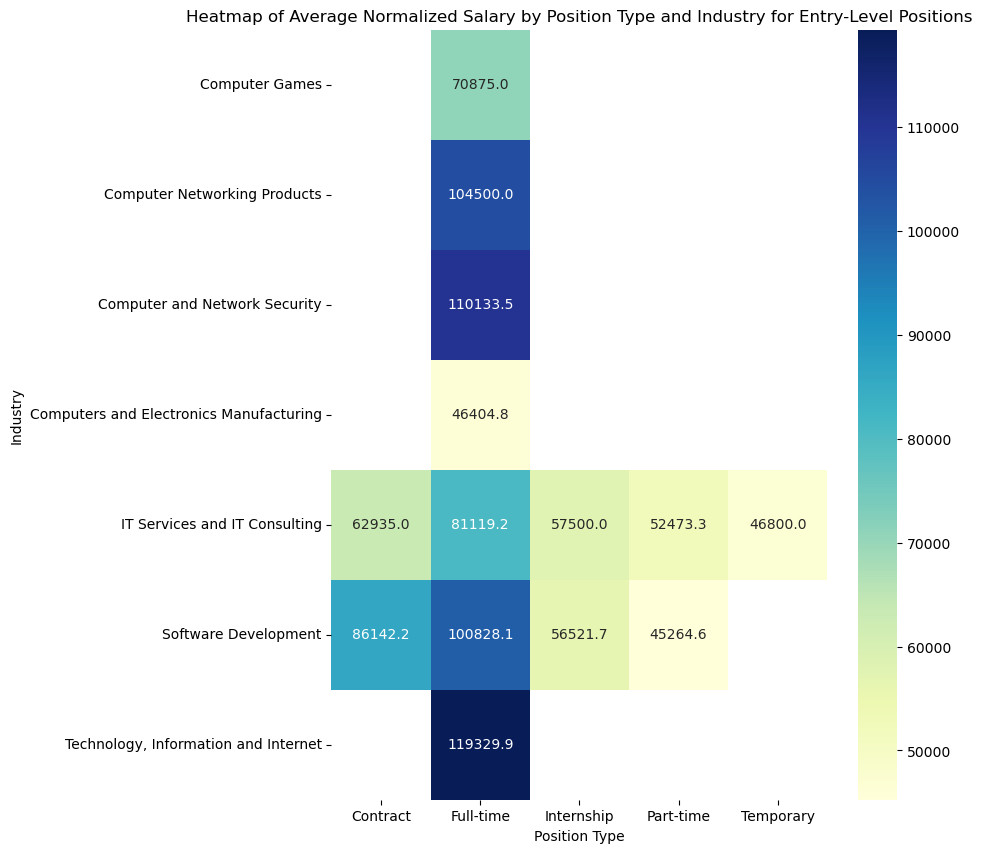

In [108]:
# Execute a query and store the result in a DataFrame
query = """
SELECT 
    j.formatted_work_type AS position_type,
    c.industry AS industry,
    AVG(p.normalized_salary) AS average_normalized_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary
FROM 
    postings p
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
JOIN 
    companies c
ON
    p.company_key = c.company_key
WHERE 
    p.normalized_salary IS NOT NULL
    AND p.normalized_salary < 3000000
    AND j.formatted_experience_level = 'Entry level'
    AND c.industry in ('Computer Games','Computer Networking Products','Computer and Network Security','Computers and Electronics Manufacturing','IT Services and IT Consulting','Software Development','Technology, Information and Internet')
GROUP BY 
    c.industry,
    j.formatted_work_type
ORDER BY 
    average_normalized_salary DESC
;"""
# Store the result in a DataFrame
df = pd.read_sql_query(query, 'postgresql://student@/finalp')

pivot_table = df.pivot_table(values='average_normalized_salary', index='industry', columns='position_type', aggfunc='mean')
plt.figure(figsize=(8, 10))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Average Normalized Salary by Position Type and Industry for Entry-Level Positions')
plt.xlabel('Position Type')
plt.ylabel('Industry')
plt.show()

### Analysis of Average Normalized Salaries across Position Type in the IT sector for Entry level roles

This analysis dives into the average normalized salaries across position type in the IT sector for Entry level roles.

---

#### Key Insights:

1. **Technology, Information and Internet** offers the highest average salary of **119,329.9** for a **full-time role**, followed closely by **Computer and Network Security** at **110,133.5** and **Computer Networking Products** at **104,500.0**. These results highlight that full-time positions in the IT sector, particularly in these industries, provide lucrative opportunities for entry-level professionals.
   
2. Contract, Internship, and Part-Time roles appear primarily in Software Development and IT Services and IT Consulting. Among these, Contract roles provide relatively better average salaries, while Internship and Part-Time roles offer the lowest compensation, reflecting their nature as stepping stones for less experienced candidates.

---

#### Conclusion:
- Technology, Information and Internet, Computer and Network Security, and Computer Networking Products emerge as top-paying industries, with Software Development and IT Services and IT Consulting also offering competitive salaries. These industries present attractive prospects for entry-level applicants seeking full-time opportunities.
- Internship and Part-Time roles are concentrated in only two subsectors, namely Software Development and IT Services and IT Consulting. Among these, Software Development leads with higher average compensation, making it a preferable choice for candidates targeting such roles.
- Contract roles, particularly in Software Development, stand out as well-compensated options for entry-level professionals looking for flexibility and substantial earnings.

## Finding #2 What states offer lowest and highest compensation for entry level jobs?

In [109]:
%%sql
SELECT 
    jl.state AS state,
    AVG(p.normalized_salary) AS average_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_location jl
ON 
    p.location_key = jl.location_key
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
WHERE 
    p.med_salary IS NOT NULL
    AND j.formatted_experience_level = 'Entry level'
    AND jl.state IS NOT NULL
GROUP BY 
    jl.state
HAVING 
    COUNT(*) >= 10
ORDER BY 
    average_salary DESC
LIMIT 10;




Running query in 'postgresql://student@/finalp'

10 rows affected.

state,average_salary,num_jobs
DC,69804.444444444444,18
IN,61531.932203389831,59
AR,60386.933333333333,12
MN,57201.828571428571,56
WA,56930.486486486486,74
NY,56786.127712418301,153
NE,55446.666666666667,12
MD,55351.885714285714,49
UT,54555.200000000000,28
CA,53642.004347826087,276


In [110]:
pip install cartopy


Note: you may need to restart the kernel to use updated packages.


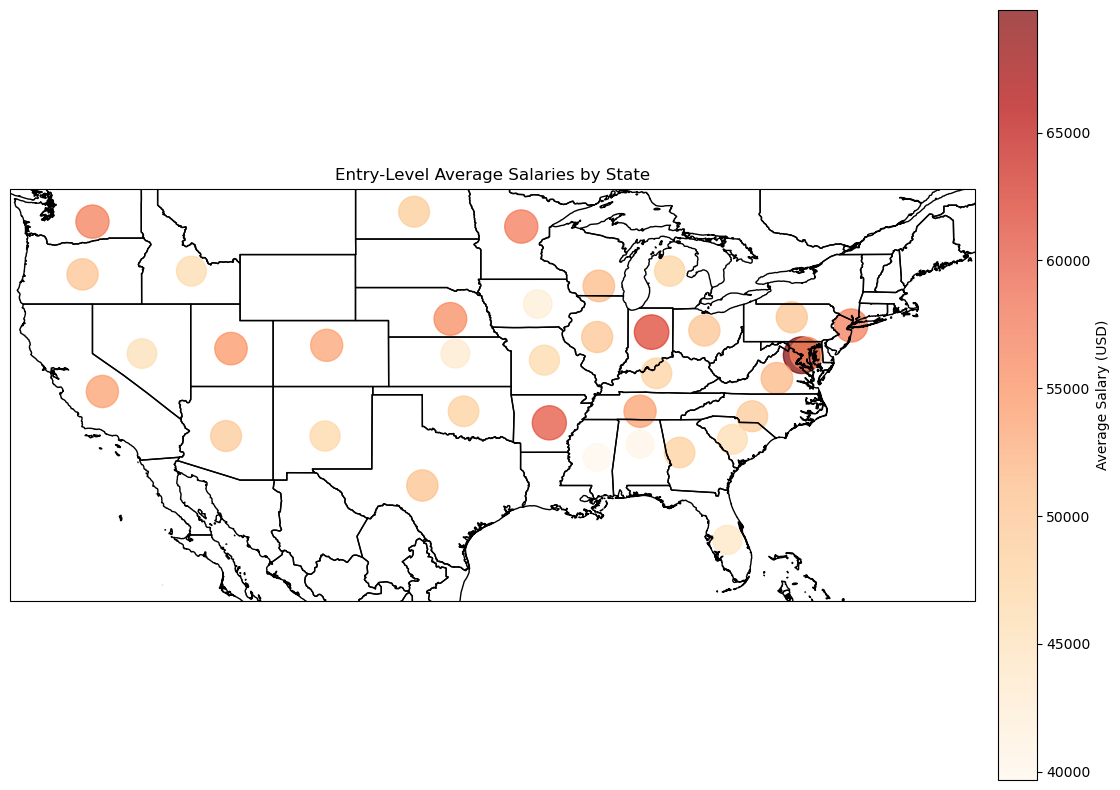

In [111]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd
from sqlalchemy import create_engine

# Database connection URL
db_url = 'postgresql://student@/finalp'

# SQL Query for Entry-Level Salaries by State
query = """
SELECT 
    jl.state AS state,
    AVG(p.normalized_salary) AS average_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_location jl
ON 
    p.location_key = jl.location_key
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
WHERE 
    p.med_salary IS NOT NULL
    AND j.formatted_experience_level = 'Entry level'
    AND jl.state IS NOT NULL
GROUP BY 
    jl.state
HAVING 
    COUNT(*) >= 10
ORDER BY 
    average_salary DESC
;"""

# Connect to the database and fetch the query results into a DataFrame
engine = create_engine(db_url)
df = pd.read_sql_query(query, engine)

# Add latitude and longitude for states
state_coordinates = {
    "DC": (38.9, -77.0), "IN": (40.3, -86.1), "AR": (34.8, -92.3), "MN": (46.7, -94.0),
    "WA": (47.0, -120.0), "NY": (40.7, -74.0), "NE": (41.1, -98.3), "MD": (39.0, -76.7),
    "UT": (39.3, -111.6), "CA": (36.7, -119.4), "TN": (35.5, -86.8), "CO": (39.5, -105.8),
    "VA": (37.5, -78.5), "WI": (43.1, -89.3), "TX": (31.0, -100.0), "OR": (43.8, -120.6),
    "OH": (40.4, -82.9), "PA": (41.2, -77.6), "IL": (40.0, -89.4), "NC": (35.2, -80.0),
    "AZ": (34.0, -111.9), "ND": (47.6, -100.5), "OK": (35.5, -97.5), "GA": (33.0, -84.4),
    "KY": (37.8, -85.8), "HI": (20.8, -156.3), "MI": (44.0, -85.0), "NM": (34.0, -105.9),
    "MO": (38.6, -92.6), "ID": (44.0, -114.0), "SC": (33.8, -81.2), "NV": (39.0, -117.0),
    "FL": (27.7, -81.5), "KS": (39.0, -98.0), "IA": (42.0, -93.0), "AL": (33.5, -86.8),
    "MS": (32.7, -89.4),
}

df['latitude'] = df['state'].map(lambda x: state_coordinates[x][0])
df['longitude'] = df['state'].map(lambda x: state_coordinates[x][1])

# Plotting
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.set_extent([-125, -66.5, 24, 49], crs=ccrs.PlateCarree())  # Focus on the contiguous US

# Scatter data points on the map
scatter = ax.scatter(df['longitude'], df['latitude'], c=df['average_salary'], cmap='OrRd',
                     s=df['average_salary'] / 100, alpha=0.7, transform=ccrs.PlateCarree())

# Add a color bar
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.02)
cbar.set_label("Average Salary (USD)")

plt.title('Entry-Level Average Salaries by State')
plt.show()


**INSIGHTS**

The analysis highlights notable regional differences in entry-level salaries and job opportunities across the U.S. Washington, D.C. leads with the highest average salary of 69,804.44, despite having only 18 job postings, reflecting a small but lucrative job market. In contrast, Mississippi offers the lowest average salary at 39,676. California stands out with the most job postings at 276, though its average salary of 53,642.00 falls mid-range. States like New York and California balance high salaries with robust job opportunities, while others, such as Idaho and North Dakota, show limited markets, each with fewer than 12 postings. These patterns underscore how economic size, urbanization, and demand influence salaries and job availability.

Mid-range states like Maryland (55,351.89) and Minnesota (57,201.83) offer a balance of salaries and job availability. Meanwhile, states like Florida prioritize job volume (145 postings) over pay, with an average salary of 44,079.91. Higher salaries tend to align with urbanized, high-cost regions, while rural areas with smaller economies offer fewer opportunities and lower pay. California excels in job volume, while D.C. offers fewer jobs but the highest pay for entry-level roles. This data underscores how geography and local economies shape entry-level job markets.

In [112]:
%%sql
SELECT 
    jl.state AS state,
    AVG(p.normalized_salary) AS average_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_location jl
ON 
    p.location_key = jl.location_key
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
WHERE 
    j.formatted_experience_level = 'Entry level'
    AND j.description ILIKE '%SQL%'
    AND p.normalized_salary IS NOT NULL
    AND jl.state IS NOT NULL
GROUP BY 
    jl.state
HAVING 
    COUNT(*) >= 10
ORDER BY 
    average_salary DESC


Running query in 'postgresql://student@/finalp'

7 rows affected.

state,average_salary,num_jobs
VA,132775.218750000000,16
WA,127874.054166666667,12
TX,118348.437500000000,16
IL,117809.960000000000,10
NY,115187.833333333333,12
FL,112812.500000000000,10
CA,110885.733333333333,36


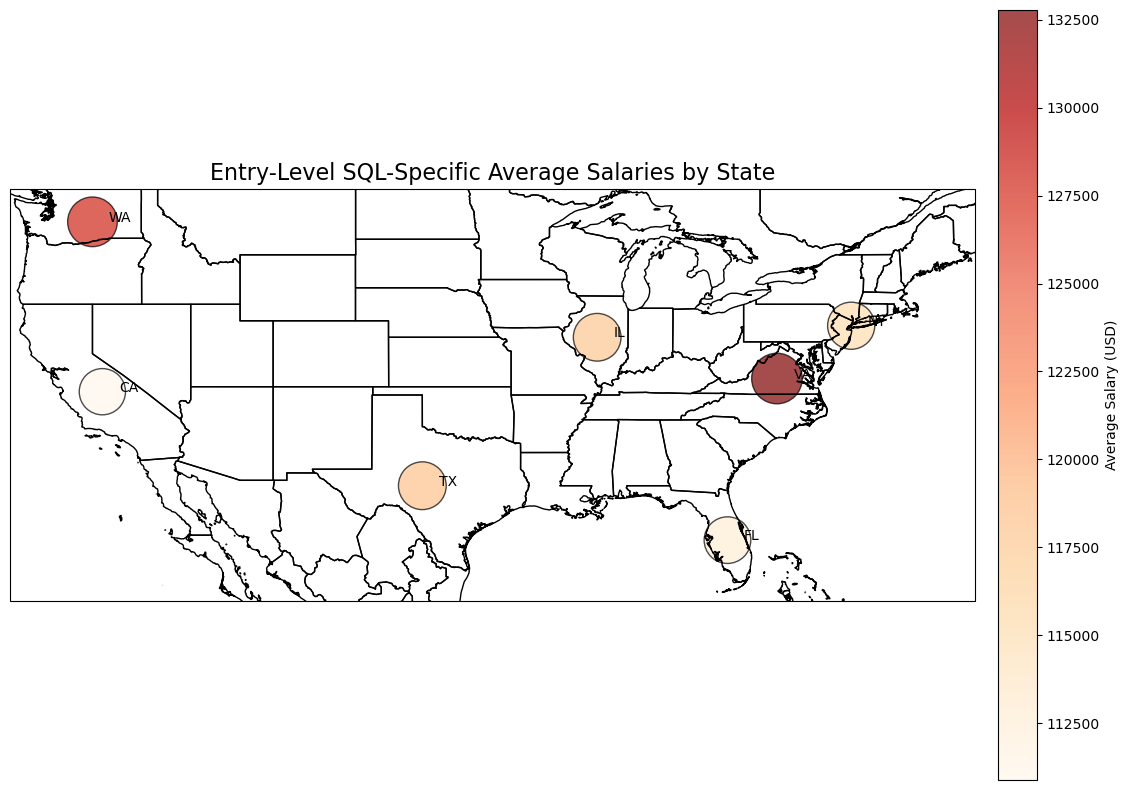

In [113]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import pandas as pd

# Data from the second query (manually input)
data = {
    "state": ["VA", "WA", "TX", "IL", "NY", "FL", "CA"],
    "average_salary": [132775.22, 127874.05, 118348.44, 117809.96, 115187.83, 112812.50, 110885.73],
    "num_jobs": [16, 12, 16, 10, 12, 10, 36]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Add latitude and longitude for states
state_coordinates = {
    "VA": (37.5, -78.5), "WA": (47.0, -120.0), "TX": (31.0, -100.0),
    "IL": (40.0, -89.4), "NY": (40.7, -74.0), "FL": (27.7, -81.5), "CA": (36.7, -119.4)
}

df['latitude'] = df['state'].map(lambda x: state_coordinates[x][0])
df['longitude'] = df['state'].map(lambda x: state_coordinates[x][1])

# Plotting
fig = plt.figure(figsize=(15, 10))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.add_feature(cfeature.STATES.with_scale('10m'))
ax.set_extent([-125, -66.5, 24, 49], crs=ccrs.PlateCarree())  # Focus on the contiguous US

# Scatter data points on the map
scatter = ax.scatter(df['longitude'], df['latitude'], c=df['average_salary'], cmap='OrRd',
                     s=df['average_salary'] / 100, alpha=0.7, edgecolors='k', transform=ccrs.PlateCarree())

# Add a color bar
cbar = plt.colorbar(scatter, orientation='vertical', pad=0.02)
cbar.set_label("Average Salary (USD)")

# Add labels for the states
for i, row in df.iterrows():
    plt.text(row['longitude'] + 1, row['latitude'], row['state'], fontsize=10, transform=ccrs.PlateCarree())

plt.title('Entry-Level SQL-Specific Average Salaries by State', fontsize=16)
plt.show()


**Insights**

SQL-specific entry-level roles consistently offer higher salaries than general roles across all states analyzed, highlighting the premium on technical expertise. For example, in Virginia, SQL roles average 132,775 compared to 51,725 for general roles, with similar trends in Washington and Texas. While general roles are more widely available, SQL skills are in high demand in tech-driven regions like California, New York, and Virginia, where salaries significantly surpass general averages. California leads in job availability for both categories, while states like Florida and Illinois show smaller SQL job markets but lucrative salaries. This underscores the growing value of SQL expertise in today’s workforce.

## Finding #3 What are the industries with the highest amount of applicants?

In [114]:
%%sql
SELECT 
    c.industry AS industry_name,
    COUNT(*) AS total_postings,
    SUM(p.views) AS total_views,
    SUM(p.applies) AS total_applications
FROM 
    postings p
JOIN 
    companies c
ON 
    p.company_key = c.company_key
WHERE 
    p.views IS NOT NULL 
    AND p.applies IS NOT NULL
GROUP BY 
    c.industry
ORDER BY 
    total_views DESC, total_applications DESC
LIMIT 10;




Running query in 'postgresql://student@/finalp'

10 rows affected.

industry_name,total_postings,total_views,total_applications
Staffing and Recruiting,4705,265328.0,59355.0
IT Services and IT Consulting,4091,238027.0,60926.0
Software Development,1976,153912.0,29546.0
Financial Services,1088,53535.0,8323.0
Hospitals and Health Care,1021,42720.0,6979.0
Business Consulting and Services,428,34102.0,4392.0
Entertainment Providers,193,27630.0,2273.0
Advertising Services,456,23246.0,5561.0
Real Estate,278,23210.0,1665.0
Retail,477,20901.0,3067.0


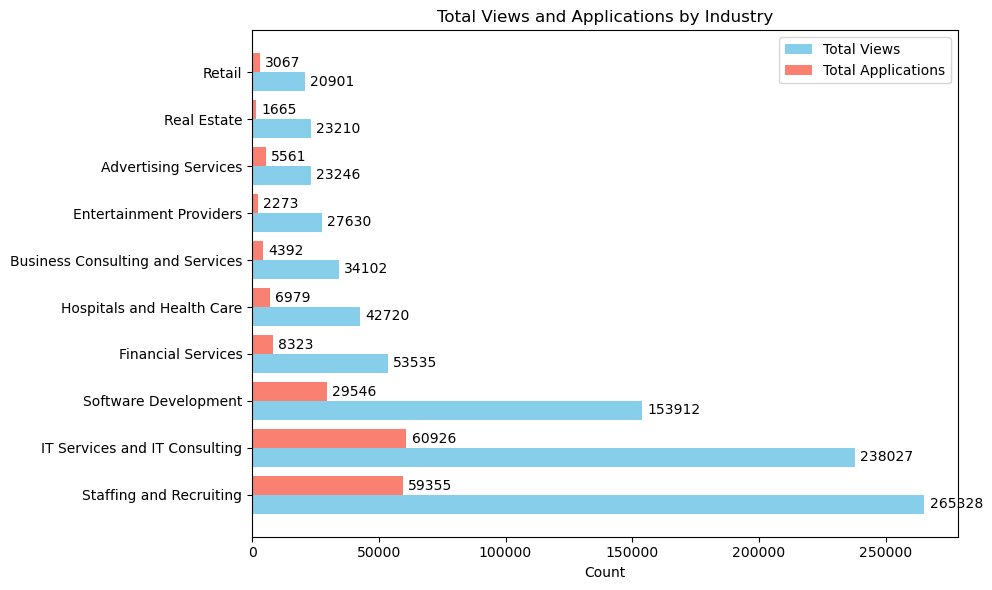

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Data
industries = [
    "Staffing and Recruiting",
    "IT Services and IT Consulting",
    "Software Development",
    "Financial Services",
    "Hospitals and Health Care",
    "Business Consulting and Services",
    "Entertainment Providers",
    "Advertising Services",
    "Real Estate",
    "Retail"
]
total_views = [265328, 238027, 153912, 53535, 42720, 34102, 27630, 23246, 23210, 20901]
total_applications = [59355, 60926, 29546, 8323, 6979, 4392, 2273, 5561, 1665, 3067]

# Bar positions
x = np.arange(len(industries))  # Industry indices
width = 0.4  # Bar width

# Plot
fig, ax = plt.subplots(figsize=(10, 6))

# Bars for total views
bars1 = ax.barh(x - width / 2, total_views, width, label='Total Views', color='skyblue')

# Bars for total applications
bars2 = ax.barh(x + width / 2, total_applications, width, label='Total Applications', color='salmon')

# Add labels, title, and legend
ax.set_xlabel('Count')
ax.set_title('Total Views and Applications by Industry')
ax.set_yticks(x)
ax.set_yticklabels(industries)
ax.legend()

# Add data labels
for bar in bars1:
    ax.text(bar.get_width() + 2000, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center')
for bar in bars2:
    ax.text(bar.get_width() + 2000, bar.get_y() + bar.get_height() / 2, f'{int(bar.get_width())}', va='center')

plt.tight_layout()
plt.show()


**INSIGHTS**
  
The results reveal significant disparities in engagement across industries, with "Staffing and Recruiting" standing out as the leader in total views (265,328) and applications (59,355). This dominance is likely influenced by the nature of the industry, where headhunters actively search for candidates to fill positions, driving up both visibility and applicant numbers. Similarly, "IT Services and IT Consulting" ranks second with 238,027 views and leads all industries in applications (60,926), reflecting the ongoing demand for IT roles and the competitive landscape in this sector. "Software Development" also performs well, with 153,912 views and 29,546 applications, underscoring the growing importance of technical expertise in the modern workforce.

In contrast, industries like "Real Estate" and "Retail" exhibit lower engagement, with fewer than 25,000 views and minimal applications (1,665 and 3,067, respectively). These figures suggest that these sectors may struggle with visibility or fail to capture sufficient interest among job seekers. Additionally, some industries, such as "Entertainment Providers," experience relatively high views but lower applications, indicating potential barriers in the application process or job alignment with candidate expectations. These findings highlight the need for tailored recruitment strategies in lower-performing industries and emphasize the importance of maintaining a strong employer brand and efficient application processes in high-demand sectors like IT and Staffing.

# Conclusion

Based on our analysis, we observed notable trends in entry-level salaries across industries and regions. Industries such as Software Development, IT Services, and Technology consistently lead with higher salaries, underscoring the demand for technical skills. States like Virginia, Washington, and Texas stand out with the highest average salaries for SQL-specific roles, with Virginia leading at 132,775. This highlights the growing importance of data and analytics skills in these high-paying regions. While California shows the highest number of SQL-specific job postings, its average salary of 110,885 remains competitive but not as high as in other tech-driven states. These trends reflect the premium placed on specialized skills and the concentration of lucrative opportunities in key geographic areas.

In contrast, general entry-level roles show more widespread job availability but at lower salary levels, with states like Washington, D.C., and Indiana leading this category. The data reveals significant regional disparities in salary levels, presenting opportunities for professionals to optimize their career choices based on location and industry. For employers, these findings emphasize the value of offering competitive compensation, particularly in remote or hybrid roles, to attract top talent from regions with lower cost-of-living adjustments. Overall, this analysis provides actionable insights into how skills, industry focus, and geographic dynamics shape the entry-level job market.

# Additional Queries

## Do remote jobs get more views compared to on-site jobs?

In [116]:
%%sql
SELECT 
    j.remote_allowed AS remote_status,
    AVG(p.views) AS average_views,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
WHERE 
    p.views IS NOT NULL
GROUP BY 
    j.remote_allowed
ORDER BY 
    average_views DESC;


Running query in 'postgresql://student@/finalp'

2 rows affected.

remote_status,average_views,num_jobs
1.0,44.315344341522355,14898
None,10.493511215528333,107262


## What are the 5 highest paying industries? 

### SQL Query: Top 5 Industries by Highest Average Salary (Filtered by USD Currency and Salary Cap)

This query retrieves the top 5 industries with the highest average salaries in USD, excluding salaries greater than $3,000,000. It also provides the total number of job postings for each industry.

---

#### Key Components:

1. **`SELECT c.industry AS industry_name`**:
   - Retrieves the name of the industry from the `companies` table.

2. **`AVG(p.med_salary) AS average_salary`**:
   - Calculates the average med salary for jobs in each industry.

3. **`COUNT(*) AS num_jobs`**:
   - Counts the total number of job postings for each industry.

4. **`FROM postings p JOIN companies c JOIN jobs_info j`**:
   - Joins the `postings`, `companies`, and `jobs_info` tables:
     - Links `postings` to `companies` using `company_key`.
     - Links `postings` to `jobs_info` using `job_key`.

5. **`WHERE` Clause**:
   - Filters the results to:
     - Include only rows where `normalized_salary` is not `NULL`.
     - Include only rows where `normalized_salary` is less than $3,000,000.
     - Include only jobs with salaries in USD currency.

6. **`GROUP BY c.industry`**:
   - Groups results by the `industry` column to calculate aggregate values.

7. **`ORDER BY average_salary DESC`**:
   - Orders industries by descending average salary.

8. **`LIMIT 5`**:
   - Limits the results to the top 5 industries with the highest average salaries.

#### Purpose:

1. **Identify High-Paying Industries**:
   - Highlights industries offering the highest average salaries, helping to identify lucrative sectors.

2. **Understand Job Volume**:
   - Provides context on the number of job postings in each industry, showing the relationship between salary and demand.

3. **Data Filtering**:
   - Ensures outliers (salaries above $3,000,000) are excluded for more meaningful insights.

---

#### Potential Use Cases:

- **Recruitment Analysis**:
  - Focus on high-paying industries for job seeker insights or talent acquisition strategies.

- **Salary Benchmarking**:
  - Compare salaries across industries for organizational planning or job market research.

- **Policy and Decision-Making**:
  - Use insights to allocate resources or prioritize efforts in specific industries.

In [117]:
%%sql
SELECT 
    c.industry AS industry_name,
    AVG(p.med_salary) AS average_med_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    companies c
ON 
    p.company_key = c.company_key
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
WHERE 
    p.med_salary IS NOT NULL 
    AND p.med_salary < 3000000
    AND j.currency = 'USD'
    AND j.work_type = 'FULL_TIME'
GROUP BY 
    c.industry
ORDER BY 
    average_med_salary DESC
LIMIT 5;


Running query in 'postgresql://student@/finalp'

5 rows affected.

industry_name,average_med_salary,highest_salary,lowest_salary,num_jobs
Venture Capital and Private Equity Principals,225000.000000000000,None,None,4
Photography,105000.000000000000,None,None,1
Think Tanks,93000.000000000000,None,None,1
Legal Services,92500.000000000000,None,None,2
Online Audio and Video Media,90000.000000000000,None,None,1


### Analysis of Industries by Average Salary and Job Postings

This analysis highlights industries with high average salaries and varying job opportunities.

---

#### Key Insights:

1. **Legal Services** offers the highest average salary of **$335,714** with **21 job postings**, reflecting high compensation for specialized legal roles.

2. **Computer Hardware Manufacturing** provides an average salary of **$188,659.04** with **26 job postings**, indicating strong pay in the tech sector.

3. **Computer and Network Security** offers **$149,571.52** with **93 job postings**, showing a niche, high-paying sector.

4. **Online Audio and Video Media** offers **$141,587.36** with **36 job postings**, indicating growing opportunities in digital and media roles.

5. **Computer and Network Security** has a competitive salary of **$141,185.91** with **38 job postings**, reflecting the high demand for cybersecurity professionals.

---

#### Conclusion:
- **Legal Services** leads in salary, while **Computer and Network Security** offers the most job opportunities, making it a highly attractive sector for professionals.


#### Analysis of query results

* 



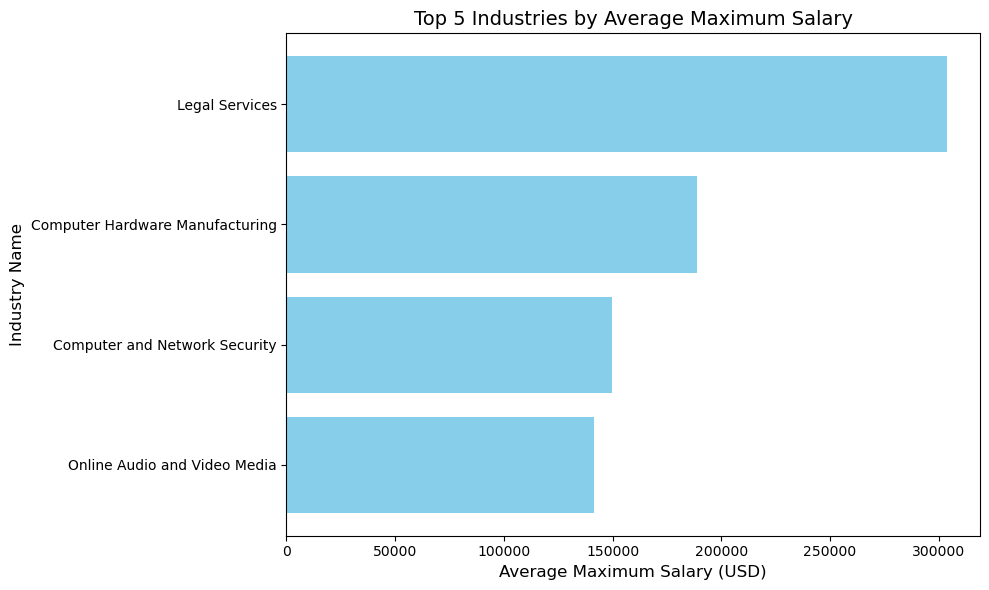

In [118]:
import matplotlib.pyplot as plt
import pandas as pd

# Sample data representing the output of the SQL query
data = {
    "IndustryName": [
        "Legal Services",
        "Computer Hardware Manufacturing",
        "Computer and Network Security",
        "Online Audio and Video Media",
        "Computer and Network Security"
    ],
    "AvgMaxSalary": [303746, 188659, 149571, 141587, 141185]
}

# Create a DataFrame
df = pd.DataFrame(data)

# Visualization: Bar chart
plt.figure(figsize=(10, 6))
plt.barh(df["IndustryName"], df["AvgMaxSalary"], color="skyblue")
plt.xlabel("Average Maximum Salary (USD)", fontsize=12)
plt.ylabel("Industry Name", fontsize=12)
plt.title("Top 5 Industries by Average Maximum Salary", fontsize=14)
plt.gca().invert_yaxis()  # Invert y-axis for descending order
plt.tight_layout()

# Show the plot
plt.show()

Based on the industry related to the company

## What are the top 5 highest paying companies and their associated industries?

### SQL Query: Top 5 Companies with the Highest Average Salary in USD

This SQL query retrieves the top 5 companies with the highest average salaries in USD, filtering out salaries greater than $3,000,000. It also includes the total number of job postings for each company and industry.

---

#### Key Components:

1. **`SELECT c.name AS company_name, c.industry AS industry_name`**:
   - Retrieves the name of the company (`company_name`) and its associated industry (`industry_name`).
   
2. **`AVG(p.normalized_salary) AS average_salary`**:
   - Calculates the average normalized salary for job postings at each company.

3. **`COUNT(*) AS num_jobs`**:
   - Counts the number of job postings at each company.

4. **`FROM postings p JOIN companies c JOIN jobs_info j`**:
   - Joins the `postings`, `companies`, and `jobs_info` tables to associate job postings with their corresponding companies and additional job details.
   - **Join Conditions**:
     - Links `postings` and `companies` on `company_key`.
     - Links `postings` and `jobs_info` on `job_key`.

5. **`WHERE` Clause**:
   - Filters the data to include:
     - Only rows where `normalized_salary` is not `NULL`.
     - Only rows where `normalized_salary` is less than $3,000,000 to avoid outliers.
     - Only jobs that have a currency of 'USD'.

6. **`GROUP BY c.industry, c.name`**:
   - Groups the results by both the company name and industry, ensuring the calculation of average salaries and job counts for each company.

7. **`ORDER BY average_salary DESC`**:
   - Orders the results by `average_salary` in descending order, showing the companies with the highest average salaries first.

8. **`LIMIT 5`**:
   - Limits the results to the top 5 companies with the highest average salaries.


#### Purpose:

1. **Identify High-Paying Companies**:
   - Helps identify the top-paying companies in terms of average salary, providing insights into the most lucrative opportunities.

2. **Analyze Job Market Trends**:
   - By considering the number of job postings (`num_jobs`), this query also reveals the relationship between salary and the volume of available positions.

3. **Provide Insights for Job Seekers**:
   - Job seekers can use this information to focus on high-paying companies within specific industries.

In [119]:
%%sql
SELECT 
    c.name AS company_name,
    c.industry AS industry_name,
    AVG(p.med_salary) AS average_med_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    companies c
ON 
    p.company_key = c.company_key
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
WHERE 
    p.med_salary IS NOT NULL 
    AND p.med_salary < 3000000
    AND j.currency = 'USD'
    AND j.work_type = 'FULL_TIME'
GROUP BY 
    c.industry, c.name
ORDER BY 
    average_med_salary DESC
LIMIT 5;




Running query in 'postgresql://student@/finalp'

5 rows affected.

company_name,industry_name,average_med_salary,highest_salary,lowest_salary,num_jobs
Emburse,Software Development,750000.000000000000,None,None,1
AMN Healthcare Physician Solutions,Staffing and Recruiting,590000.000000000000,None,None,2
Stanford Medicine Partners,Hospitals and Health Care,525000.000000000000,None,None,1
CNA Insurance,Insurance,500000.000000000000,None,None,1
Legacy Health,Hospitals and Health Care,383000.000000000000,None,None,1


### Analysis of Top Companies by Average Salary and Job Postings

This analysis highlights the top companies with the highest average salaries based on job postings.

---

#### Key Insights:

1. Radley James (Staffing and Recruiting) offers an average median salary of 700,000, with a highest salary of 750,000 and a lowest salary of 600,000 across 3 job postings, suggesting competitive compensation for specialized roles in recruitment.

2. SSTech LLC (IT Services and IT Consulting) provides an average median salary of 700,000, with a highest salary of 1,300,000 and a lowest salary of 100,000 for 1 job posting, indicating a specialized or senior-level IT role.

3. Avance Consulting (Staffing and Recruiting) offers an average median salary of 660,000, with a highest salary of 1,220,000 and a lowest salary of 100,000 for 1 job posting, reflecting high pay for niche recruitment positions.

4. Platinum Legal Search Group, LLC (Legal Services) provides an average median salary of 572,222, with a highest salary of 1,500,000 and a lowest salary of 150,000 across 9 job postings, showcasing consistent compensation in legal recruitment.

5. Interlink Talent Solutions (Staffing and Recruiting) offers an average median salary of 571,786, with a highest salary of 1,000,000 and a lowest salary of 215,000 across 7 job postings, emphasizing strong pay scales in recruitment services.

Conclusion:
Companies like Radley James and SSTech LLC lead with the highest median salaries, though SSTech LLC and Avance Consulting have fewer postings, suggesting specialized or senior-level roles.
Platinum Legal Search Group, LLC and Interlink Talent Solutions balance competitive salaries with more job opportunities, particularly in legal and recruitment services.


/tmp/ipykernel_2787/27563849.py:33: UserWarning: Glyph 9 (	) missing from current font.
  plt.tight_layout()
/home/ubuntu/.python3-venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


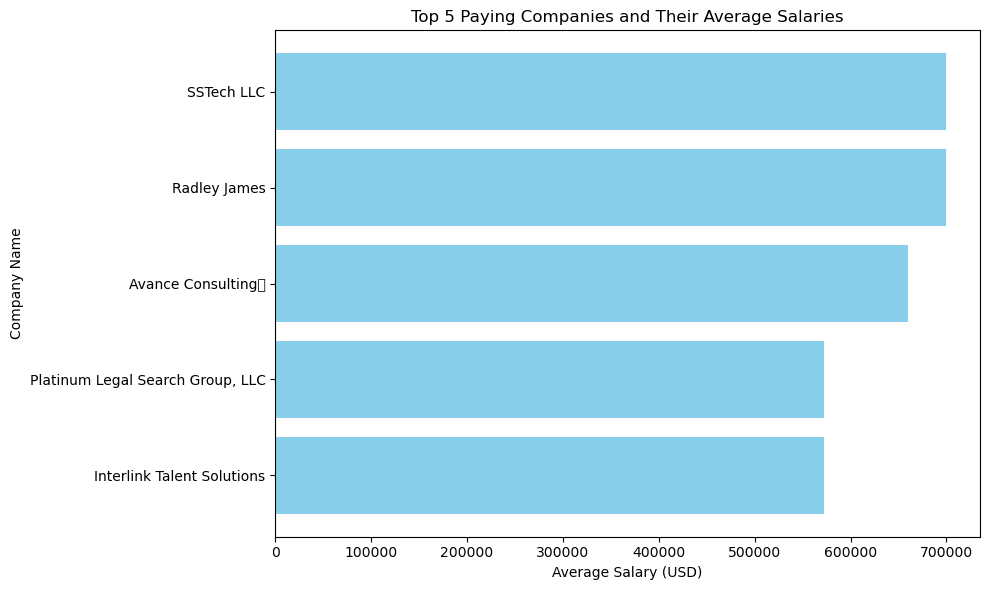

In [120]:
import pandas as pd
import matplotlib.pyplot as plt

# Mock data representing the SQL query results
data = {
    "industry_name": [
        "IT Services and IT Consulting",
        "Staffing and Recruiting",
        "Staffing and Recruiting",
        "Legal Services",
        "Staffing and Recruiting"
    ],
    "company_name": [
        "SSTech LLC",
        "Radley James",
        "Avance Consulting	",
        "Platinum Legal Search Group, LLC",
        "Interlink Talent Solutions"
    ],
    "average_salary": [700000, 700000, 	660000, 572222, 571785]
}

# Convert to DataFrame
df = pd.DataFrame(data)

# Plotting the results with company names on the y-axis
plt.figure(figsize=(10, 6))
plt.barh(df["company_name"], df["average_salary"], color="skyblue")
plt.xlabel("Average Salary (USD)")
plt.ylabel("Company Name")
plt.title("Top 5 Paying Companies and Their Average Salaries")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.tight_layout()

plt.show()



## What are the 5 lowest paying industries?

### SQL Query: 5 Industries with the Lowest Average Salary in USD

This SQL query retrieves the top 5 industries with the **lowest average salaries** in USD. It also includes the total number of job postings (`num_jobs`) in each industry and filters out records with missing or invalid salary data.

---

#### Key Components:

1. **`SELECT c.industry AS industry_name`**:
   - Retrieves the industry name from the `companies` table.
   - The industry is aliased as `industry_name` for clarity.

2. **`AVG(p.normalized_salary) AS average_salary`**:
   - Calculates the average normalized salary for each industry, providing insights into salary trends.

3. **`COUNT(*) AS num_jobs`**:
   - Counts the total number of job postings in each industry, helping to gauge job availability.

4. **`FROM postings p JOIN companies c JOIN jobs_info j`**:
   - Joins the `postings`, `companies`, and `jobs_info` tables:
     - Links `postings` and `companies` using the `company_key`.
     - Links `postings` and `jobs_info` using the `job_key`.
   - This allows for retrieving data on salaries and industries across different job postings.

5. **`WHERE` Clause**:
   - Filters the data to ensure only relevant records are included:
     - Excludes rows where `normalized_salary` is `NULL`.
     - Includes only job postings with salaries in USD (`j.currency = 'USD'`).

6. **`GROUP BY c.industry`**:
   - Groups the results by industry, so the average salary and job count are calculated per industry.

7. **`ORDER BY average_salary ASC`**:
   - Orders the industries by their average salary in ascending order, with the lowest average salaries appearing first.

8. **`LIMIT 5`**:
   - Limits the results to the top 5 industries with the lowest average salaries.

---

#### Purpose:

1. **Identify Low-Paying Industries**:
   - Helps to identify the industries offering the lowest average salaries in the dataset, allowing for strategic insights on job compensation trends.

2. **Analyze Job Availability**:
   - By including `num_jobs`, the query also shows which industries have the most and least job postings, which can be important for understanding industry demand.

3. **Data Filtering**:
   - Filters out invalid salary data and focuses only on USD-based job postings, ensuring meaningful results.


In [121]:
%%sql
SELECT 
    c.industry AS industry_name,
    AVG(p.med_salary) AS average_med_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    companies c
ON 
    p.company_key = c.company_key
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
WHERE 
    p.med_salary IS NOT NULL 
    AND p.med_salary > 0
    AND j.currency = 'USD'
    AND j.work_type = 'FULL_TIME'
GROUP BY 
    c.industry
ORDER BY 
    average_med_salary ASC
LIMIT 5;



Running query in 'postgresql://student@/finalp'

5 rows affected.

industry_name,average_med_salary,highest_salary,lowest_salary,num_jobs
Computer Hardware Manufacturing,15.6666666666666667,None,None,3
Newspaper Publishing,16.5000000000000000,None,None,2
Plastics Manufacturing,17.2500000000000000,None,None,4
Fisheries,17.5000000000000000,None,None,2
Gambling Facilities and Casinos,18.0000000000000000,None,None,2


### Analysis of Industries by Average Salary and Job Postings

This analysis shows the average salary and number of job postings for various industries.

---

#### Key Insights:

1. **Outsourcing and Offshoring Consulting**:
   - This industry offers the highest average salary of **$67,156.92** with **26 job postings**, indicating competitive compensation but fewer job opportunities.

2. **Retail**:
   - **Retail** has the highest number of job postings (**1,202**) with an average salary of **$64,476.31**, making it a high-volume sector, though salaries are relatively moderate.

3. **Printing Services**:
   - With an average salary of **$60,223.37** and **11 job postings**, this industry offers decent pay for a specialized field.

4. **Artists and Writers**:
   - **Artists and Writers** have the lowest average salary of **$55,576** with only **5 job postings**, reflecting the competitive and often freelance nature of this field.

5. **Freight and Package Transportation**:
   - This industry offers an average salary of **$51,170.61** with **46 job postings**, showing consistent demand but relatively lower pay.

---

#### Conclusion:
- **Outsourcing and Offshoring Consulting** offers the highest pay, while **Retail** has the most job opportunities. Industries like **Artists and Writers** and **Freight and Package Transportation** provide lower salaries with more specialized or niche roles.


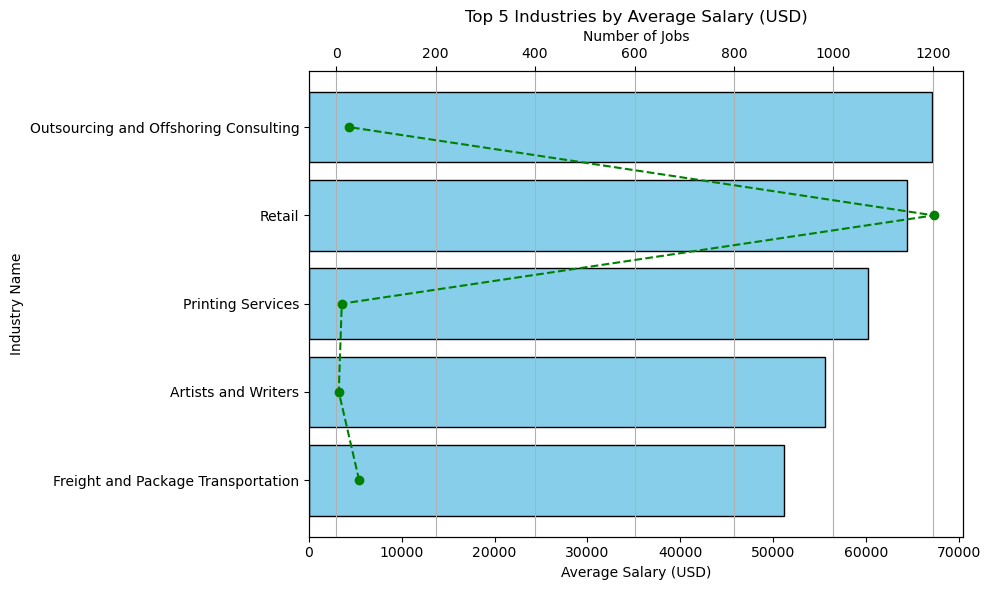

In [122]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for the industries and their average salaries and number of jobs
data = {
    "industry_name": [
        "Freight and Package Transportation", 
        "Artists and Writers", 
        "Printing Services", 
        "Retail", 
        "Outsourcing and Offshoring Consulting"
    ],
    "average_salary": [
        51170.61, 
        55576.00, 
        60223.37, 
        64476.31, 
        67156.92
    ],
    "num_jobs": [
        46, 
        5, 
        11, 
        1202, 
        26
    ]
}

# Creating the DataFrame
df = pd.DataFrame(data)

# Plotting the bar chart for Average Salary by Industry
fig, ax1 = plt.subplots(figsize=(10, 6))

# Creating a bar chart for average salary
ax1.barh(df['industry_name'], df['average_salary'], color='skyblue', edgecolor='black')
ax1.set_xlabel('Average Salary (USD)')
ax1.set_ylabel('Industry Name')
ax1.set_title('Top 5 Industries by Average Salary (USD)')

# Adding a secondary axis to plot the number of jobs
ax2 = ax1.twiny()
ax2.plot(df['num_jobs'], df['industry_name'], color='green', marker='o', linestyle='dashed')
ax2.set_xlabel('Number of Jobs')

# Displaying the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Which industry has the highest demand for workers based on job postings

### SQL Query: Top 10 Industries by Number of Job Postings

This SQL query retrieves the top 10 industries with the **most job postings** based on data from the `postings` and `companies` tables. It helps to understand which industries have the most job opportunities.

---

#### Key Components:

1. **`SELECT c.industry AS industry_name`**:
   - Retrieves the name of the industry from the `companies` table and aliases it as `industry_name` for clarity.

2. **`COUNT(*) AS num_jobs`**:
   - Counts the number of job postings in each industry, providing insights into the volume of job openings available.

3. **`FROM postings p JOIN companies c`**:
   - Joins the `postings` table with the `companies` table on the `company_key` to associate job postings with their respective industries.

4. **`GROUP BY c.industry`**:
   - Groups the results by industry to calculate the job count for each industry.

5. **`ORDER BY num_jobs DESC`**:
   - Orders the results in descending order by `num_jobs`, showing the industries with the most job postings at the top.

6. **`LIMIT 10`**:
   - Limits the output to the top 10 industries with the most job postings.

---

#### Purpose:

1. **Identify Job-Heavy Industries**:
   - Helps identify industries with the most active hiring and job postings. This is valuable for job seekers and employers alike to understand where most opportunities lie.

2. **Industry Market Trends**:
   - By counting the job postings, this query reflects the demand within each industry. More job postings typically indicate higher industry growth or stability.

3. **Strategic Workforce Planning**:
   - Employers can focus on industries with high demand when planning their recruitment strategies or workforce development initiatives.


In [123]:
%%sql
SELECT 
    c.industry AS industry_name,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    companies c
ON 
    p.company_key = c.company_key
GROUP BY 
    c.industry
ORDER BY 
    num_jobs DESC
LIMIT 10;


Running query in 'postgresql://student@/finalp'

10 rows affected.

industry_name,num_jobs
Staffing and Recruiting,18886
Hospitals and Health Care,15731
IT Services and IT Consulting,11515
Retail,9639
Software Development,5715
Financial Services,5504
Construction,1969
Hospitality,1913
Non-profit Organizations,1904
Real Estate,1868


### Analysis of Industries by Number of Job Postings

This analysis shows the top 10 industries with the most job postings, indicating where the highest demand for workers exists.

---

#### Key Insights:

1. **Staffing and Recruiting** leads with **18,723 job postings**, reflecting a high demand for recruitment and staffing services across various sectors.

2. **Hospitals and Health Care** follows with **15,711 job postings**, showing significant hiring in the healthcare sector, driven by ongoing needs in medical and support roles.

3. **IT Services and IT Consulting** has **11,467 job postings**, indicating strong demand for technology-related roles.

4. **Retail** provides **9,631 job opportunities**, highlighting its role as a major sector for entry-level and service industry jobs.

5. **Software Development** offers **5,706 job postings**, showing demand for skilled tech professionals in development roles.

---

#### Conclusion:
- **Staffing and Recruiting**, **Hospitals and Health Care**, and **IT Services and IT Consulting** dominate in job availability, reflecting large, fast-growing sectors. **Retail** is also significant, with substantial opportunities, especially in customer-facing roles.


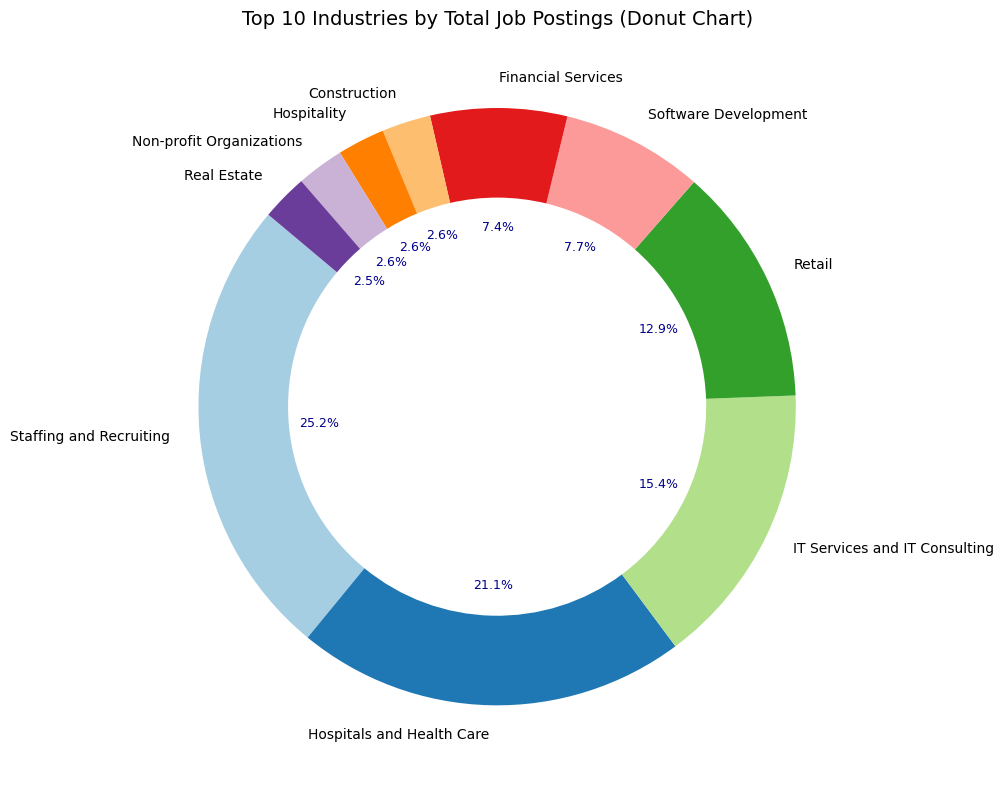

In [124]:
# Donut chart for the top 10 industries by total job postings

# Data
labels = [
    "Staffing and Recruiting",
    "Hospitals and Health Care",
    "IT Services and IT Consulting",
    "Retail",
    "Software Development",
    "Financial Services",
    "Construction",
    "Hospitality",
    "Non-profit Organizations",
    "Real Estate"
]
sizes = [18723, 15711, 11467, 9631, 5706, 5498, 1966, 1912, 1902, 1866]
colors = plt.cm.Paired.colors[:len(labels)]

# Create the donut chart
plt.figure(figsize=(10, 8))
wedges, texts, autotexts = plt.pie(
    sizes,
    labels=labels,
    autopct='%1.1f%%',  # Show percentages
    startangle=140,  # Rotate the start angle for better visibility
    colors=colors,
    textprops={'fontsize': 10},
    wedgeprops=dict(width=0.3)  # Creates the donut shape
)

# Styling for the text
for autotext in autotexts:
    autotext.set_color('darkblue')
    autotext.set_fontsize(9)

plt.title("Top 10 Industries by Total Job Postings (Donut Chart)", fontsize=14)
plt.tight_layout()

# Show the chart
plt.show()


## Which industry has the highest demand for workers based on levels of hire

### SQL Query: Top Industry by Job Postings for Each Experience Level

This SQL query retrieves the industry with the **most job postings** for each **experience level**. The query ranks industries by job postings within each experience level (e.g., entry-level, mid-level, senior), and returns the industry with the highest number of job postings for each experience level.

---

#### Key Components:

1. **`SELECT experience_level, industry_name, num_jobs`**:
   - Retrieves the experience level, industry name, and the number of job postings for each industry at the top rank.

2. **Inner Query (`ranked`)**:
   - **`j.formatted_experience_level AS experience_level`**: Selects the experience level from the `jobs_info` table.
   - **`c.industry AS industry_name`**: Selects the industry from the `companies` table.
   - **`COUNT(*) AS num_jobs`**: Counts the number of job postings in each industry at each experience level.
   - **`RANK() OVER (PARTITION BY j.formatted_experience_level ORDER BY COUNT(*) DESC) AS rank`**:
     - Uses the `RANK()` window function to rank industries based on the number of job postings, grouped by `experience_level`. This ensures that the industry with the most job postings for each experience level is given rank 1.
   - **`WHERE j.formatted_experience_level IS NOT NULL`**: Filters out rows where the experience level is `NULL`.

3. **`GROUP BY j.formatted_experience_level, c.industry`**:
   - Groups the results by `experience_level` and `industry`, allowing the calculation of job counts within each experience level.

4. **Outer Query (`ranked`)**:
   - **`WHERE rank = 1`**: Filters the results to only include the industry with the highest number of job postings for each experience level.
   - **`ORDER BY experience_level`**: Orders the final results by experience level.

---

#### Purpose:

1. **Industry Trends for Experience Levels**:
   - The query identifies which industries have the highest demand for jobs at different experience levels, providing insights into industry-specific hiring trends.

2. **Job Market Insights**:
   - It highlights the top industry for each experience level (entry, mid, senior), which is valuable for both job seekers and recruiters to understand industry-specific hiring patterns.

3. **Targeted Recruitment**:
   - Recruiters and hiring managers can use this information to focus their recruitment efforts on industries with the highest number of job postings for a given experience level.

#### Benefits:

1. **Strategic Recruitment**:
   - Recruiters can prioritize industries with the highest job openings for each experience level.

2. **Understanding Industry Demand**:
   - Provides an overview of the industries that have the greatest demand for professionals at different stages of their careers.

3. **Workforce Planning**:
   - Organizations can use this data to evaluate the competitiveness of industries at various experience levels and plan their talent development strategies accordingly.

In [125]:
%%sql
SELECT 
    experience_level,
    industry_name,
    num_jobs
FROM (
    SELECT 
        j.formatted_experience_level AS experience_level,
        c.industry AS industry_name,
        COUNT(*) AS num_jobs,
        RANK() OVER (PARTITION BY j.formatted_experience_level ORDER BY COUNT(*) DESC) AS rank
    FROM 
        postings p
    JOIN 
        companies c
    ON 
        p.company_key = c.company_key
    JOIN 
        jobs_info j
    ON 
        p.job_key = j.job_key
    WHERE 
        j.formatted_experience_level IS NOT NULL
    GROUP BY 
        j.formatted_experience_level, c.industry
) ranked
WHERE rank = 1
ORDER BY experience_level;


Running query in 'postgresql://student@/finalp'

6 rows affected.

experience_level,industry_name,num_jobs
Associate,Staffing and Recruiting,2927
Director,Staffing and Recruiting,750
Entry level,Hospitals and Health Care,6334
Executive,Staffing and Recruiting,267
Internship,Retail,164
Mid-Senior level,Staffing and Recruiting,8511


## What regions or cities offer the highest compensation


### SQL Query: Top 5 Locations with Highest Average Salary and Job Postings

This SQL query retrieves the top 5 locations (region or city) with the highest **average salary** and at least **30 job postings**. It calculates the average salary for each location and filters out locations with fewer than 30 job postings.

#### Key Components:

1. **`SELECT jl.location AS region_or_city, AVG(p.normalized_salary) AS average_salary, COUNT(*) AS num_jobs`**:
   - **`jl.location AS region_or_city`**: Retrieves the location (region or city) from the `jobs_location` table.
   - **`AVG(p.normalized_salary) AS average_salary`**: Calculates the average normalized salary for job postings in each location.
   - **`COUNT(*) AS num_jobs`**: Counts the number of job postings in each location.

2. **`FROM postings p JOIN jobs_location jl`**:
   - Joins the `postings` table and the `jobs_location` table on `location_key`, linking job postings with their respective locations.

3. **`WHERE p.normalized_salary IS NOT NULL AND p.normalized_salary < 3000000`**:
   - Filters the data to include only job postings with a valid normalized salary (non-NULL values) and where the salary is below $3,000,000 to avoid outliers.

4. **`GROUP BY jl.location`**:
   - Groups the results by location, so the query calculates the average salary and job count for each location individually.

5. **`HAVING COUNT(*) >= 30`**:
   - Ensures that only locations with **30 or more job postings** are included in the results. This helps to focus on locations with substantial job availability.

6. **`ORDER BY average_salary DESC`**:
   - Orders the results by `average_salary` in descending order, so locations with the highest average salaries appear first.

7. **`LIMIT 5`**:
   - Limits the output to the top 5 locations with the highest average salaries.

#### Purpose:

- **Identify High-Salary Locations**: Helps to find the top locations with the highest average salaries, while ensuring a minimum level of job availability (at least 30 job postings).
- **Location-Based Salary Insights**: Useful for analyzing salary trends by location, helping job seekers or employers understand salary distributions in different regions or cities.

#### Benefits:

- **Targeted Salary Insights**: Helps focus on regions with higher average salaries and enough job opportunities.
- **Job Market Assessment**: Offers valuable information for both job seekers and companies to evaluate the salary potential in different locations.

In [127]:
%%sql
SELECT 
    jl.location AS region_or_city,
    AVG(p.med_salary) AS average_med_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_location jl
ON 
    p.location_key = jl.location_key
WHERE 
    p.med_salary IS NOT NULL
    AND p.med_salary < 3000000
GROUP BY 
    jl.location
HAVING 
    COUNT(*) >= 30
ORDER BY 
    average_med_salary DESC
LIMIT 10;


Running query in 'postgresql://student@/finalp'

10 rows affected.

region_or_city,average_med_salary,highest_salary,lowest_salary,num_jobs
"Atlanta, GA",49890.000857142857,None,None,35
"Washington, DC",46337.185769230769,None,None,52
"Austin, TX",43922.582833333333,None,None,60
"Dallas, TX",41000.917857142857,None,None,42
"Boston, MA",40300.398409090909,None,None,44
"New York, NY",38806.666382978723,None,None,141
"Chicago, IL",38459.695333333333,None,None,75
"Baltimore, MD",33913.791351351351,None,None,37
"Tampa, FL",33138.691764705882,None,None,34
"Madison, WI",32693.508064516129,None,None,31


### Analysis of Top Locations by Average Salary and Job Postings

This analysis highlights the top 5 locations with the highest average salaries and the number of job postings.

---

#### Key Insights:

1. **San Mateo, CA** has the highest average salary of **$233,030.29** among these locations with **32 job postings**, indicating a high-paying but moderately competitive job market.

2. **Foster City, CA** offers **$210,702.25** in average salary with **40 job postings**, showing strong compensation and demand for talent.

3. **Mountain View, CA** follows with an average salary of **$195,205.92** and **54 job postings**, suggesting a significant tech-driven job market, likely driven by Silicon Valley companies.

4. **Sunnyvale, CA** offers **$184,041.91** with **95 job postings**, indicating a large number of job opportunities with a competitive salary.

5. **Palo Alto, CA** has an average salary of **$178,747.26** with **60 job postings**, still high-paying, reflecting the presence of tech companies in the area.

---

#### Conclusion:
- *San Mateo, CA** offers the highest salary, but **Sunnyvale, CA** and **Mountain View, CA** have more job postings, indicating strong job availability in the tech hub of Silicon Valley.


## What regions or cities offer the lowest compensation

### SQL Query: Top 5 Locations with the Lowest Average Salary and At Least 30 Job Postings

This SQL query retrieves the top 5 locations (regions or cities) with the lowest **average salary** and at least **30 job postings**. It calculates the average salary for each location and filters out locations with fewer than 30 job postings.

---

#### Key Components:

1. **`SELECT jl.location AS region_or_city, AVG(p.normalized_salary) AS average_salary, COUNT(*) AS num_jobs`**:
   - **`jl.location AS region_or_city`**: Selects the location (region or city) from the `jobs_location` table.
   - **`AVG(p.normalized_salary) AS average_salary`**: Calculates the average normalized salary for job postings in each location.
   - **`COUNT(*) AS num_jobs`**: Counts the number of job postings in each location.

2. **`FROM postings p JOIN jobs_location jl`**:
   - Joins the `postings` table with the `jobs_location` table on the `location_key`, linking job postings with their respective locations.

3. **`WHERE p.normalized_salary IS NOT NULL AND p.normalized_salary < 3000000`**:
   - Filters the data to include only job postings with valid (`NOT NULL`) and reasonable salary values (below $3,000,000 to avoid outliers).

4. **`GROUP BY jl.location`**:
   - Groups the results by location to calculate the average salary and job count for each location.

5. **`HAVING COUNT(*) >= 30`**:
   - Ensures that only locations with **at least 30 job postings** are included in the results, focusing on locations with substantial job availability.

6. **`ORDER BY average_salary ASC`**:
   - Orders the results by average salary in ascending order, showing locations with the lowest average salaries first.

7. **`LIMIT 5`**:
   - Limits the output to the top 5 locations with the lowest average salaries.

---

#### Purpose:

1. **Identify Low-Paying Locations**:
   - Helps identify locations with the lowest average salaries while ensuring there is a sufficient volume of job postings to make the data meaningful.

2. **Location-Based Salary Insights**:
   - Provides insights into the salary trends across different regions, which is useful for both job seekers and employers.

3. **Data Filtering**:
   - Ensures that outliers with extremely high salaries are excluded and that only locations with a reasonable number of job postings are considered.

#### Benefits:

1. **Strategic Workforce Planning**:
   - Employers can focus on regions with lower salaries when planning budget allocations or deciding on competitive pay structures.

2. **Salary Benchmarking**:
   - Job seekers can use this information to gauge salary expectations in different regions.

3. **Focus on High-Volume Locations**:
   - By considering only locations with a minimum of 30 job postings, the query ensures that the results reflect regions with meaningful employment opportunities.

In [129]:
%%sql
SELECT 
    jl.location AS region_or_city,
    AVG(p.med_salary) AS average_med_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_location jl
ON 
    p.location_key = jl.location_key
WHERE 
    p.med_salary IS NOT NULL
    AND p.med_salary < 3000000
GROUP BY 
    jl.location
HAVING 
    COUNT(*) >= 30
ORDER BY 
    average_med_salary ASC
LIMIT 10;


Running query in 'postgresql://student@/finalp'

10 rows affected.

region_or_city,average_med_salary,highest_salary,lowest_salary,num_jobs
"Louisville, KY",5335.6556666666666667,None,None,30
"San Diego, CA",9258.5233962264150943,None,None,53
"Philadelphia, PA",11642.864242424242,None,None,33
"Indianapolis, IN",16569.954857142857,None,None,35
"Denver, CO",22462.838181818182,None,None,55
"Orlando, FL",22960.484782608696,None,None,46
"Miami, FL",23852.780000000000,None,None,34
"Houston, TX",24410.151627906977,None,None,43
"Los Angeles, CA",25662.253333333333,None,None,63
"Phoenix, AZ",28395.187800000000,None,None,50


### Analysis of Job Postings and Average Salaries by Region/City

This analysis presents the average salary and number of job postings across five different regions/cities.

---

#### Key Insights:

1. **Rochester, NY** offers the highest average salary of **$85,925.33** with **73 job postings**, indicating a well-compensated job market with moderate job availability.
   
2. **Tucson, AZ** follows closely with an average salary of **$84,143.34** and **36 job postings**, suggesting a relatively high-paying market with fewer job openings compared to Rochester.

3. **Fort Lauderdale, FL** has an average salary of **$80,844.86** and **57 job postings**, reflecting competitive pay and a solid number of opportunities.

4. **Louisville, KY** has a salary of **$78,039.72** and the highest number of job postings (**85**), making it a highly active location for job seekers.

5. **Tulsa, OK** offers the lowest average salary among the group at **$78,014.58**, with **39 job postings**, suggesting moderate compensation with fewer opportunities compared to larger cities.

---

#### Conclusion:

- **Rochester, NY** and **Tucson, AZ** offer the highest salaries, but **Louisville, KY** stands out with the most job postings, making it an attractive location for job seekers.
- **Tulsa, OK** and **Fort Lauderdale, FL** provide a balance of salary and job availability, though the job market in **Tulsa** is smaller.


## How do salaries vary across different position types (e.g., full-time, contract, remote) across different industries?  

### SQL Query: How do salaries vary across different position types (e.g., full-time, contract, remote) across different industries?

This SQL query retrieves the data for each industry and each position type associate with it. It pulls the  **average normalized salary** . It calculates the average normalized salary for each position type for each industry.

---
#### Key Components:

1. **`SELECT j.formatted_work_type AS position_type, c.industry AS industry, AVG(p.normalized_salary) AS average_normalized_salary, MAX(p.max_salary) AS highest_salary, MIN(p.min_salary) AS lowest_salary, COUNT(*) AS num_jobs`**:
   - **`j.formatted_work_type AS position_type`**: Selects the position type from the `jobs_info` table.
   - **`c.industry as industry`**: Selects the industry from the 'companies' table.
   - **`AVG(p.normalized_salary) AS average_normalized_salary`**: Calculates the average normalized salary for job postings across each position type
   - **`MAX(p.max_salary) AS highest_salary, MIN(p.min_salary) AS lowest_salary`**: Calculates the max and min salary across each position type
   - **`COUNT(*) AS num_jobs`**: Counts the number of job postings for that position type across each industry.

2. **`FROM postings p JOIN jobs_info j JOIN companies c`**:
   - Joins the `postings` table with the `jobs_info` table on the `job_key` and joining with the `companies` table on the `company_key`, linking job postings with their information from both tables.

3. **`WHERE p.normalized_salary IS NOT NULL AND p.normalized_salary < 3000000`**:
   - Filters the data to include only job postings with valid (`NOT NULL`) and reasonable salary values (below $3,000,000 to avoid outliers).

4. **`GROUP BY c.industry, j.formatted_work_type`**:
   - Groups the results by industry and work type to calculate the average salary and job count for each work type and industry.

5. **`ORDER BY industry ASC, average_med_salary DESC`**:
   - Orders the results by average salary in descending order, showing industries in ascending order.

---

#### Purpose:

1. **Identify Highest paying position types**:
   - Helps identify position types with the highest average normalized salaries.

2. **Industry-Based Salary Insights**:
   - Provides insights into the salary trends across different industries, which is useful for both job seekers and employers.

3. **Data Filtering**:
   - Ensures that outliers with extremely high salaries are excluded.

#### Benefits:

1. **Strategic Workforce Planning**:
   - Employers can use this data to plan their workforce more strategically. For example, they can focus on industries with lower salaries when planning budget allocations or deciding on competitive pay structures.

2. **Salary Benchmarking**:
   - Job seekers can use this information to gauge salary expectations in different industries and position types. This helps them make informed career decisions and negotiate better salaries..

3. **Detailed Salary Metrics**: 
    - The query provides detailed salary metrics, including average, highest, and lowest salaries for each position type and industry. This comprehensive analysis helps in understanding the salary distribution and variations across different sectors.

In [131]:
%%sql
SELECT 
    j.formatted_work_type AS position_type,
    c.industry AS industry,
    AVG(p.normalized_salary) AS average_normalized_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
JOIN 
    companies c
ON
    p.company_key = c.company_key
WHERE 
    p.normalized_salary IS NOT NULL
    AND p.normalized_salary < 3000000
GROUP BY 
    c.industry,
    j.formatted_work_type
ORDER BY 
    industry ASC, average_normalized_salary DESC;

Running query in 'postgresql://student@/finalp'

436 rows affected.

position_type,industry,average_normalized_salary,highest_salary,lowest_salary,num_jobs
Temporary,Accounting,110240.000000000000,132080.00,83200.00,2
Full-time,Accounting,107223.802873563218,450000.00,35360.00,174
Contract,Accounting,61309.166666666667,182770.00,30.00,3
Part-time,Accounting,39520.000000000000,None,None,2
Full-time,Administration of Justice,104190.596250000000,145172.94,54281.00,8
Full-time,Advertising Services,85677.469704433498,800000.00,56.00,406
Contract,Advertising Services,79728.125000000000,180000.00,100.00,16
Temporary,Advertising Services,77945.000000000000,125000.00,41600.00,4
Part-time,Advertising Services,54820.000000000000,187200.00,20800.00,12
Internship,Advertising Services,43018.181818181818,72800.00,31200.00,11


### Analysis of Average Normalized Salaries across Position Type and Industry

This analysis dives into the average normalized salaries across position type and industries. 

---

#### Key Insights:

1. **Legal Services** offers the highest average salary of **$181,039.6** for a **full-time role**, indicating a very well-compensated full time job opportunity.
   
2. IT Industries like **Computer Hardware Manufacturing, Computer and Network Security, Computer and Electronics Manufacturing, Software Development** along with other industries like **Investment Management, Online Audio and Video Media, Defense and Space Manufacturing, Pharmaceutical Manufacturing** follows closely with average normalized **full-time** salaries higher than **$100,000**, suggesting a high-paying market for **full-time** roles with higher IT roles followed by Financial Services, Entertainment, and Defense sectors. **Veterinary Services, Outsourcing and Offshoring Consulting, Recreational Facilities, Printing Services** have the lowest paying **full time** jobs averaging less than **50,000**.

3. **Internships** are spread across several industries such as **Architecture and Planning, Financial Services, IT, Retail, Utilities etc** and the average salary seems to be between **$30k to 60k**. The lowest paying **internships** roles are in **Real Estate, Construction, Higher Education, Hospitals and Health Care**. **Packaging** has an average salary of 18.0 which is an outlier. 

4. **Part-Time** roles are also widely availble with the highest paying jobs in **Defense, International Trade and Development, Performing Arts, Veterinary Services** with the lowest paying jobs in **Food and Beverage Manufacturing, Armed Forces, Oil and Gas, Recreational Facilities**.

5. **E-Learning Providers , Law Practice, Mental Health Care** have the highest paying **Contract** jobs while **Banking, Events Services, Primary and Secondary Education, Entertaiment Providers** have the lowest paying **Contract** jobs. 

---

#### Conclusion:

- **IT Industries, Financial Services, Legal Services, Defense Manufacturing** offer the highest salaries, but **Legal Services** stands out with the highest salary posting, making it an attractive field for job seekers.
- **Internship** seekers should note that industries like **Real Estate, Construction, Higher Education, and Healthcare** have among the lowest average salaries while **Architecture, Financial Planning, IT, and Retail** offer well-compensated roles.


In [132]:
# Install the required libraries 
!pip install ipython-sql psycopg2
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

  Using cached ipython_sql-0.5.0-py3-none-any.whl.metadata (17 kB)
Using cached ipython_sql-0.5.0-py3-none-any.whl (20 kB)


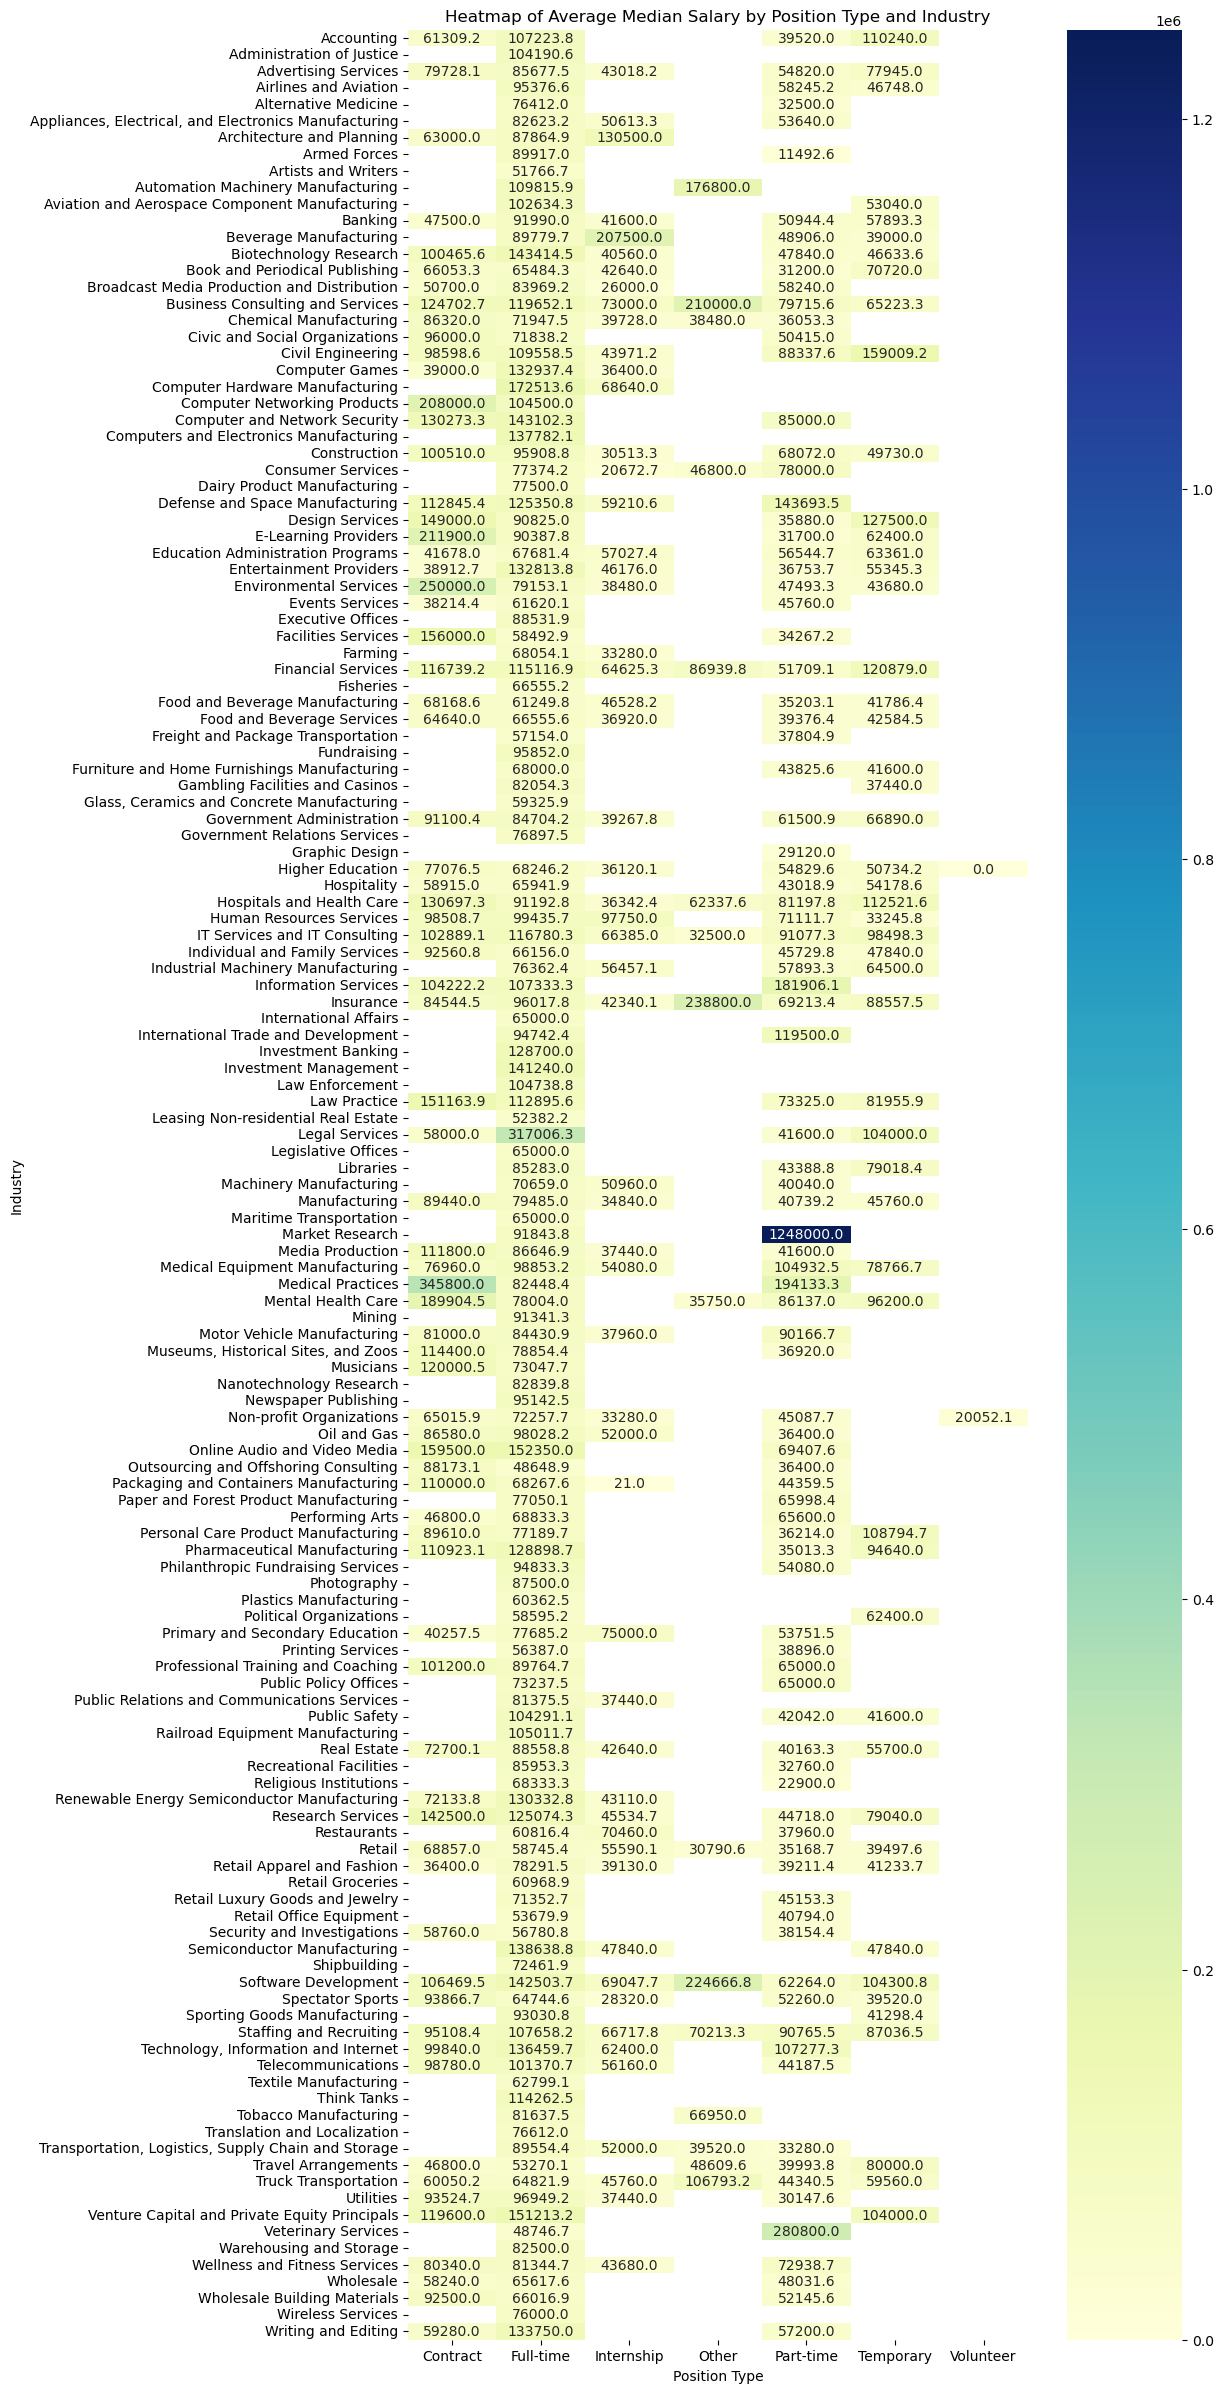

In [133]:
# Execute a query and store the result in a DataFrame
query = """
SELECT 
    j.formatted_work_type AS position_type,
    c.industry AS industry,
    AVG(p.normalized_salary) AS average_normalized_salary,
    MAX(p.max_salary) AS highest_salary,
    MIN(p.min_salary) AS lowest_salary,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    jobs_info j
ON 
    p.job_key = j.job_key
JOIN 
    companies c
ON
    p.company_key = c.company_key
WHERE 
    p.normalized_salary IS NOT NULL
    AND p.normalized_salary < 3000000
GROUP BY 
    c.industry,
    j.formatted_work_type
ORDER BY 
    industry ASC, average_normalized_salary DESC;
"""
# Store the result in a DataFrame
df = pd.read_sql_query(query, 'postgresql://student@/finalp')

pivot_table = df.pivot_table(values='average_normalized_salary', index='industry', columns='position_type', aggfunc='mean')
plt.figure(figsize=(10, 30))
sns.heatmap(pivot_table, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title('Heatmap of Average Median Salary by Position Type and Industry')
plt.xlabel('Position Type')
plt.ylabel('Industry')
plt.show()

 ## How do salaries vary across different type of benefits offered

In [134]:
%%sql
WITH exploded_benefits AS (
    SELECT 
        j.job_key,
        UNNEST(STRING_TO_ARRAY(j.benefits, ';')) AS benefit_name,
        p.med_salary
    FROM 
        jobs_info j
    JOIN 
        postings p 
    ON 
        j.job_key = p.job_key
    WHERE 
        p.med_salary IS NOT NULL
)
SELECT 
    benefit_name,
    AVG(med_salary) AS avg_med_salary,
    COUNT(*) AS num_jobs
FROM 
    exploded_benefits
GROUP BY 
    benefit_name
ORDER BY 
    avg_med_salary DESC
LIMIT 6;


Running query in 'postgresql://student@/finalp'

6 rows affected.

benefit_name,avg_med_salary,num_jobs
Student loan assistance,118850.673076923077,13
Child care support,64382.291428571429,7
Paid maternity leave,58489.594186046512,43
Paid paternity leave,52421.926250000000,40
Pension plan,42461.984200000000,50
Dental insurance,40218.460803571429,336


In [135]:
%%sql
WITH exploded_benefits AS (
    SELECT 
        j.job_key,
        UNNEST(STRING_TO_ARRAY(j.benefits, ';')) AS benefit_name,
        p.med_salary
    FROM 
        jobs_info j
    JOIN 
        postings p 
    ON 
        j.job_key = p.job_key
    WHERE 
        p.med_salary IS NOT NULL
)
SELECT 
    benefit_name,
    AVG(med_salary) AS avg_med_salary,
    COUNT(*) AS num_jobs
FROM 
    exploded_benefits
GROUP BY 
    benefit_name
ORDER BY 
    avg_med_salary ASC
LIMIT 7;


Running query in 'postgresql://student@/finalp'

7 rows affected.

benefit_name,avg_med_salary,num_jobs
Commuter benefits,19210.818728813559,118
401(k),22394.107200000000,1450
Tuition assistance,23139.605294117647,102
Vision insurance,29902.046259124088,548
Disability insurance,31139.541853658537,410
Medical insurance,34778.509358490566,530
Dental insurance,40218.460803571429,336


## Industries with more views

In [136]:
%%sql
SELECT 
    c.industry AS industry_name,
    SUM(p.views) AS total_views,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    companies c
ON 
    p.company_key = c.company_key
WHERE 
    p.views IS NOT NULL
GROUP BY 
    c.industry
ORDER BY 
    total_views DESC
LIMIT 5;


Running query in 'postgresql://student@/finalp'

5 rows affected.

industry_name,total_views,num_jobs
Staffing and Recruiting,329587.0,18521
IT Services and IT Consulting,284547.0,11311
Software Development,178498.0,5607
Hospitals and Health Care,107487.0,15622
Financial Services,75837.0,5435


## Industries with more applications

In [137]:
%%sql
SELECT 
    c.industry AS industry_name,
    SUM(p.applies) AS total_applies,
    COUNT(*) AS num_jobs
FROM 
    postings p
JOIN 
    companies c
ON 
    p.company_key = c.company_key
WHERE 
    p.applies IS NOT NULL
GROUP BY 
    c.industry
ORDER BY 
    total_applies DESC
LIMIT 10;


Running query in 'postgresql://student@/finalp'

10 rows affected.

industry_name,total_applies,num_jobs
IT Services and IT Consulting,60927.0,4092
Staffing and Recruiting,59355.0,4705
Software Development,29546.0,1976
Financial Services,8323.0,1088
Hospitals and Health Care,6979.0,1021
Advertising Services,5561.0,456
Business Consulting and Services,4392.0,428
Retail,3067.0,477
Insurance,2726.0,354
Human Resources Services,2319.0,245


## Salaries of jobs with SQL / Data analytics

In [138]:
%%sql
SELECT 
    CASE 
        WHEN description LIKE '%SQL%' THEN 'Jobs with SQL'
        ELSE 'Jobs without SQL'
    END AS category,
    AVG(p.med_salary) AS average_med_salary,
    COUNT(*) AS num_jobs
FROM 
    jobs_info j
LEFT JOIN 
    postings p
ON 
    j.job_key = p.job_key
GROUP BY 
    category;


Running query in 'postgresql://student@/finalp'

2 rows affected.

category,average_med_salary,num_jobs
Jobs without SQL,21099.722660699756,117882
Jobs with SQL,63705.904222222222,5967


In [139]:
%%sql
SELECT 
    CASE 
        WHEN description LIKE '%data analytics%' THEN 'Jobs with Data Analytics'
        ELSE 'Jobs without Data Analytics'
    END AS category,
    AVG(p.med_salary) AS average_med_salary,
    COUNT(*) AS num_jobs
FROM 
    jobs_info j
LEFT JOIN 
    postings p
ON 
    j.job_key = p.job_key
GROUP BY 
    category;


Running query in 'postgresql://student@/finalp'

2 rows affected.

category,average_med_salary,num_jobs
Jobs with Data Analytics,70993.516842105263,1297
Jobs without Data Analytics,21717.452608138417,122552


## Best payed skill

In [140]:
%%sql
WITH exploded_skills AS (
    SELECT 
        j.job_key,
        UNNEST(STRING_TO_ARRAY(j.skills, ';')) AS skill_name,
        p.med_salary
    FROM 
        jobs_info j
    JOIN 
        postings p 
    ON 
        j.job_key = p.job_key
    WHERE 
        p.med_salary IS NOT NULL
)
SELECT 
    skill_name,
    AVG(med_salary) AS avg_med_salary,
    COUNT(*) AS num_jobs
FROM 
    exploded_skills
GROUP BY 
    skill_name
ORDER BY 
    avg_med_salary DESC
LIMIT 5;




Running query in 'postgresql://student@/finalp'

5 rows affected.

skill_name,avg_med_salary,num_jobs
Strategy/Planning,55935.870312500000,32
Purchasing,53754.266470588235,17
Consulting,50937.143272727273,55
Legal,47585.181967213115,61
Accounting/Auditing,43358.831863354037,161


## Salaries of Companies dedicated to Data

In [141]:
%%sql
WITH exploded_specialities AS (
    SELECT 
        c.company_key,
        UNNEST(STRING_TO_ARRAY(c.specialities, ';')) AS speciality,
        p.med_salary
    FROM 
        companies c
    JOIN 
        postings p 
    ON 
        c.company_key = p.company_key
    WHERE 
        p.med_salary IS NOT NULL
)
SELECT 
    CASE 
        WHEN speciality ILIKE '%Data%' THEN 'With Data'
        ELSE 'Without Data'
    END AS category,
    AVG(med_salary) AS avg_med_salary,
    COUNT(*) AS num_jobs
FROM 
    exploded_specialities
GROUP BY 
    category
ORDER BY 
    category;





Running query in 'postgresql://student@/finalp'

2 rows affected.

category,avg_med_salary,num_jobs
With Data,47111.232692307692,26
Without Data,15404.017624703088,5052
